<Center><b><font size=6>LEAD SCORING CASE STUDY<font/><b/>

<Center><b><font size=3>BY - KRISHAAN BANGA <font/><b/>

**Problem Statement**:X Education is an online education company that attracts professionals to its website through various marketing channels. They aim to increase their lead conversion rate from the current 30% to around 80%. To achieve this, they want to build a lead scoring model to identify the most promising leads with a higher likelihood of becoming paying customers. Leads are generated through website visits, form submissions, referrals, and are then nurtured by the sales team. The model will assign lead scores to prioritize leads for further attention and increase the conversion rate by focusing on the most promising prospects.

### Step 1: Importing Libraries and Data

In [102]:
#import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#supress warnings
import warnings
warnings.filterwarnings("ignore")

# Sklearn libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

#statmodel libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [103]:
#Environment settings

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
pd.set_option('display.width',None)


In [104]:
# Reading the dataset
leadscore = pd.read_csv("/Users/general/Downloads/Lead Scoring Assignment/Leads.csv")

In [105]:
leadscore.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [106]:
leadscore.shape

(9240, 37)

### Step 2: EDA

In [107]:
# Check summary of all numerical columns to understand the dataset better in terms of spread and 
# also spot anything unusual

leadscore.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [108]:
# checking number of unique values in each column
leadscore.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [109]:
# Check data types of columns and nulls
leadscore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [110]:
#Checking for count of missing values in each column
leadscore.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

### 2.1 Treatment for 'Select' values

As indicated in the problem description, several categorical variables contain a category labeled "select," which requires special handling because it is essentially equivalent to a missing or null value. This situation may occur when a customer opts not to choose any specific option from the list, resulting in the data defaulting to 'Select' for such columns. 

In [111]:
# List of columns having 'Select' as value

cols_with_select_value = [col for col in leadscore.columns if len(leadscore[col].isin(['Select']).unique())>1]
print(cols_with_select_value)

['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


In [112]:
# Converting 'Select' values to NaN.
leadscore = leadscore.replace('Select', np.nan)

In [113]:
# Checking if all 'Select' values have been handled in the columns
cols_with_select_value = [col for col in leadscore.columns if len(leadscore[col].isin(['Select']).unique())>1]
print(cols_with_select_value)

[]


Now, there are no 'Select' values in the dataframe.

### 2.2 Handling Missing Values

In [114]:
# Calculating Missing Values Percentage

100*(leadscore.isna().mean()).sort_values()

Prospect ID                                       0.000000
I agree to pay the amount through cheque          0.000000
Get updates on DM Content                         0.000000
Update me on Supply Chain Content                 0.000000
Receive More Updates About Our Courses            0.000000
Through Recommendations                           0.000000
Digital Advertisement                             0.000000
Newspaper                                         0.000000
X Education Forums                                0.000000
A free copy of Mastering The Interview            0.000000
Magazine                                          0.000000
Search                                            0.000000
Newspaper Article                                 0.000000
Last Notable Activity                             0.000000
Total Time Spent on Website                       0.000000
Converted                                         0.000000
Do Not Call                                       0.0000

#### 2.2.1 Drop Columns with more than 40% Null Values

In [115]:
colms=leadscore.columns

for i in colms:
    if((100*(leadscore[i].isnull().sum()/len(leadscore.index))) >= 40):
        leadscore.drop(i, 1, inplace = True)

In [116]:
# Checking the percentage of null values for remaining columns

100*(leadscore.isna().mean()).sort_values(ascending=False)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Prospect ID                                       0.000000
Newspaper                                         0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.0000

### 2.2.2 Columns with Categorical Data

In [117]:
# Select the columns with non-numeric data type
categorical_cols = leadscore.select_dtypes(include=['category', 'object']).columns.tolist()

# Print the selected columns
print(categorical_cols)

['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'City', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']


In [118]:
columnsList= ["City","Specialization","Tags",'What matters most to you in choosing a course',
              'What is your current occupation','Country','Last Activity','Lead Source']

for i in columnsList:
        perc=100*leadscore[i].value_counts(normalize=True)
        print("value_counts % for :",i,"\n")
        print(perc,"\n")
        print("___"*40,"\n")


value_counts % for : City 

Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: City, dtype: float64 

________________________________________________________________________________________________________________________ 

value_counts % for : Specialization 

Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.037543
Healthcare Manageme

Dropping the following columns as not useful for modelling 
- 'City',
- 'Tags',
- 'Country',
- 'What matters most to you in choosing a course'

In [119]:
# Dropping Columns
print("Before Drop",leadscore.shape)
leadscore.drop(['City','Tags','Country','What matters most to you in choosing a course'],axis=1,inplace=True)
print("After Drop",leadscore.shape)

Before Drop (9240, 30)
After Drop (9240, 26)


Imputing the following columns 
- 'Specialization' - 'others'
- 'Lead Source' - 'google'
- 'Last Activity' - 'Email Opened' 
- 'What is your current occupation' - 'Unemployed'

In [120]:
# Imputing values as per the above observations/insights

missing_values={'Specialization':'Others','Lead Source':'Google','Last Activity':'Email Opened',
               'What is your current occupation':'Unemployed'}
leadscore=leadscore.fillna(value=missing_values)

In [121]:
# Re Checking the percentage of null values for remaining columns

round(((leadscore.isnull().sum()/leadscore.shape[0])*100),2).sort_values(ascending=False)

TotalVisits                                 1.48
Page Views Per Visit                        1.48
Prospect ID                                 0.00
Magazine                                    0.00
A free copy of Mastering The Interview      0.00
I agree to pay the amount through cheque    0.00
Get updates on DM Content                   0.00
Update me on Supply Chain Content           0.00
Receive More Updates About Our Courses      0.00
Through Recommendations                     0.00
Digital Advertisement                       0.00
Newspaper                                   0.00
X Education Forums                          0.00
Newspaper Article                           0.00
Search                                      0.00
Lead Number                                 0.00
What is your current occupation             0.00
Specialization                              0.00
Last Activity                               0.00
Total Time Spent on Website                 0.00
Converted           

### 2.2.3 Columns with Numerical Data

In [122]:
leadscore.TotalVisits.value_counts().head(10)

0.0    2189
2.0    1680
3.0    1306
4.0    1120
5.0     783
6.0     466
1.0     395
7.0     309
8.0     224
9.0     164
Name: TotalVisits, dtype: int64

In [123]:
# TotalVisits missing values to be imputed with mode
leadscore['TotalVisits'].fillna(leadscore['TotalVisits'].mode()[0], inplace=True)

In [124]:
leadscore.TotalVisits.value_counts().head(10)

0.0    2326
2.0    1680
3.0    1306
4.0    1120
5.0     783
6.0     466
1.0     395
7.0     309
8.0     224
9.0     164
Name: TotalVisits, dtype: int64

In [125]:
# Page Views Per Visit missing values to be imputed with mode

leadscore['Page Views Per Visit'].fillna(leadscore['Page Views Per Visit'].mode()[0], inplace=True)

In [126]:
# Re Checking the percentage of null values after handling categorical and numerical columns

round(((leadscore.isnull().sum()/leadscore.shape[0])*100),2).sort_values(ascending=False)

Prospect ID                                 0.0
Lead Number                                 0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Magazine                                    0.0
Search                                      0.0
What is your current occupation             0.0
Specialization                              0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website                 0.0
TotalVisits                                 0.0
Converted                               

### 2.3 Removing Unwanted Columns

In [127]:
100*leadscore['Last Notable Activity'].value_counts(normalize=True)

Modified                        36.872294
Email Opened                    30.595238
SMS Sent                        23.506494
Page Visited on Website          3.441558
Olark Chat Conversation          1.980519
Email Link Clicked               1.872294
Email Bounced                    0.649351
Unsubscribed                     0.508658
Unreachable                      0.346320
Had a Phone Conversation         0.151515
Email Marked Spam                0.021645
Approached upfront               0.010823
Resubscribed to emails           0.010823
View in browser link Clicked     0.010823
Form Submitted on Website        0.010823
Email Received                   0.010823
Name: Last Notable Activity, dtype: float64

In [128]:
#check for columns with one unique value, count and freq is same

leadscore.describe(include = 'object')

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240
unique,9240,5,21,2,2,17,19,6,2,1,2,2,2,2,2,1,1,1,1,2,16
top,7927b2df-8bba-4d29-b9a2-b6e0beafe620,Landing Page Submission,Google,No,No,Email Opened,Others,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
freq,1,4886,2904,8506,9238,3540,3380,8290,9226,9240,9238,9239,9239,9236,9233,9240,9240,9240,9240,6352,3407



The columns with one unique category are of no use as they have only one category of response from customer and can be dropped



In [129]:
# List of columns with one unique value whose count and frequency are same, we will drop these columns
cols_to_drop = ['Magazine','Receive More Updates About Our Courses',
                    'Update me on Supply Chain Content',
                    'Get updates on DM Content',
                    'I agree to pay the amount through cheque']


leadscore.drop(cols_to_drop, axis = 1, inplace = True)
print("After Dropping Columns",leadscore.shape)


After Dropping Columns (9240, 21)


#### 2.3.2 Dropping columns of no use for modeling

In [130]:
# Drop "Prospect ID" & "Lead Number" as they are not needed for our analysis

leadscore.drop(["Lead Number" , "Prospect ID", 'Last Notable Activity'] , axis= 1 , inplace = True)
leadscore.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,No,No,No,No,No,No,No
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,No,No,No,No,No,No,No
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,No,No,No,No,No,No,Yes
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,No,No,No,No,No,No
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,No,No,No,No,No,No,No


### 2.4 Checking & Dropping Category Columns that are Skewed

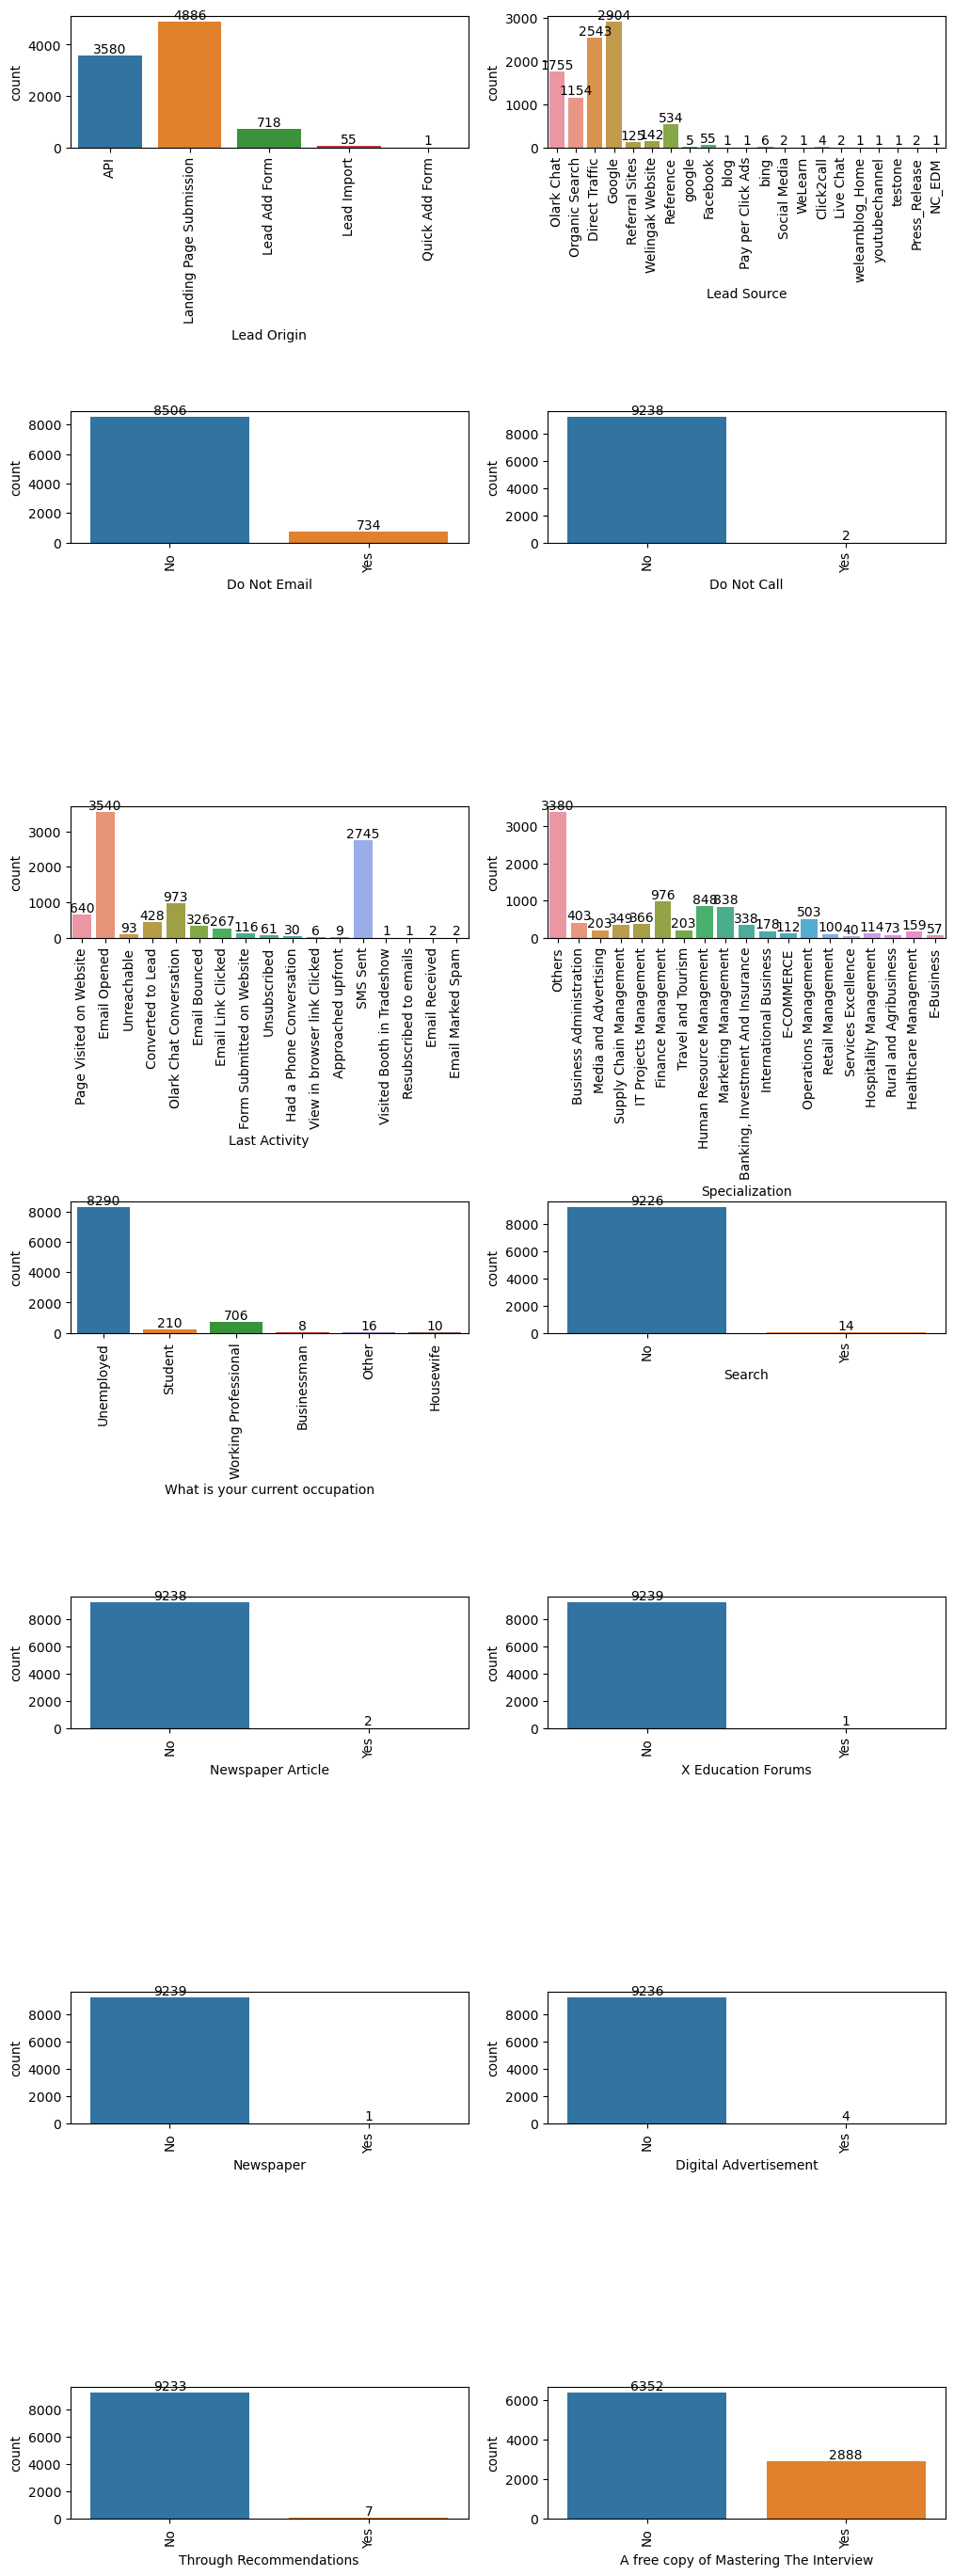

In [131]:
# plotting countplot for object dtype and histogram for number to get data distribution
categorical_col = leadscore.select_dtypes(include=['category', 'object']).columns.tolist()
plt.figure(figsize=(12,40))

plt.subplots_adjust(wspace=.2,hspace=2)
for i in enumerate(categorical_col):
    plt.subplot(8,2, i[0]+1)
    ax=sns.countplot(x=i[1],data=leadscore) 
    plt.xticks(rotation=90)
    
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')


plt.show()

Columns which have data which is highly skewed can be dropped.  

These columns will be dropped as they will not add any value to the model. 

In [132]:
# Dropping categorical columns with highly skewed data

leadscore.drop(['Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'],axis=1,inplace=True)


In [133]:
leadscore.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,No
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,No
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,No


### 2.5 Outlier Analysis

#### For Numerical Columns

In [134]:
def Check_Outliers(data,columnList):

    plt.figure(figsize=[22,11])
    plt.subplots_adjust(wspace=0.4,hspace=0.5)

    for i,j in enumerate(columnList):
        plt.subplot(2,2,i+1)

        sns.boxplot(y=data[j])     # y = df_leads[j] to make plot verticle

        plt.suptitle("\nChecking Outliers using Boxplot",fontsize=20,color="green")
        plt.ylabel(None)
        plt.title(j)

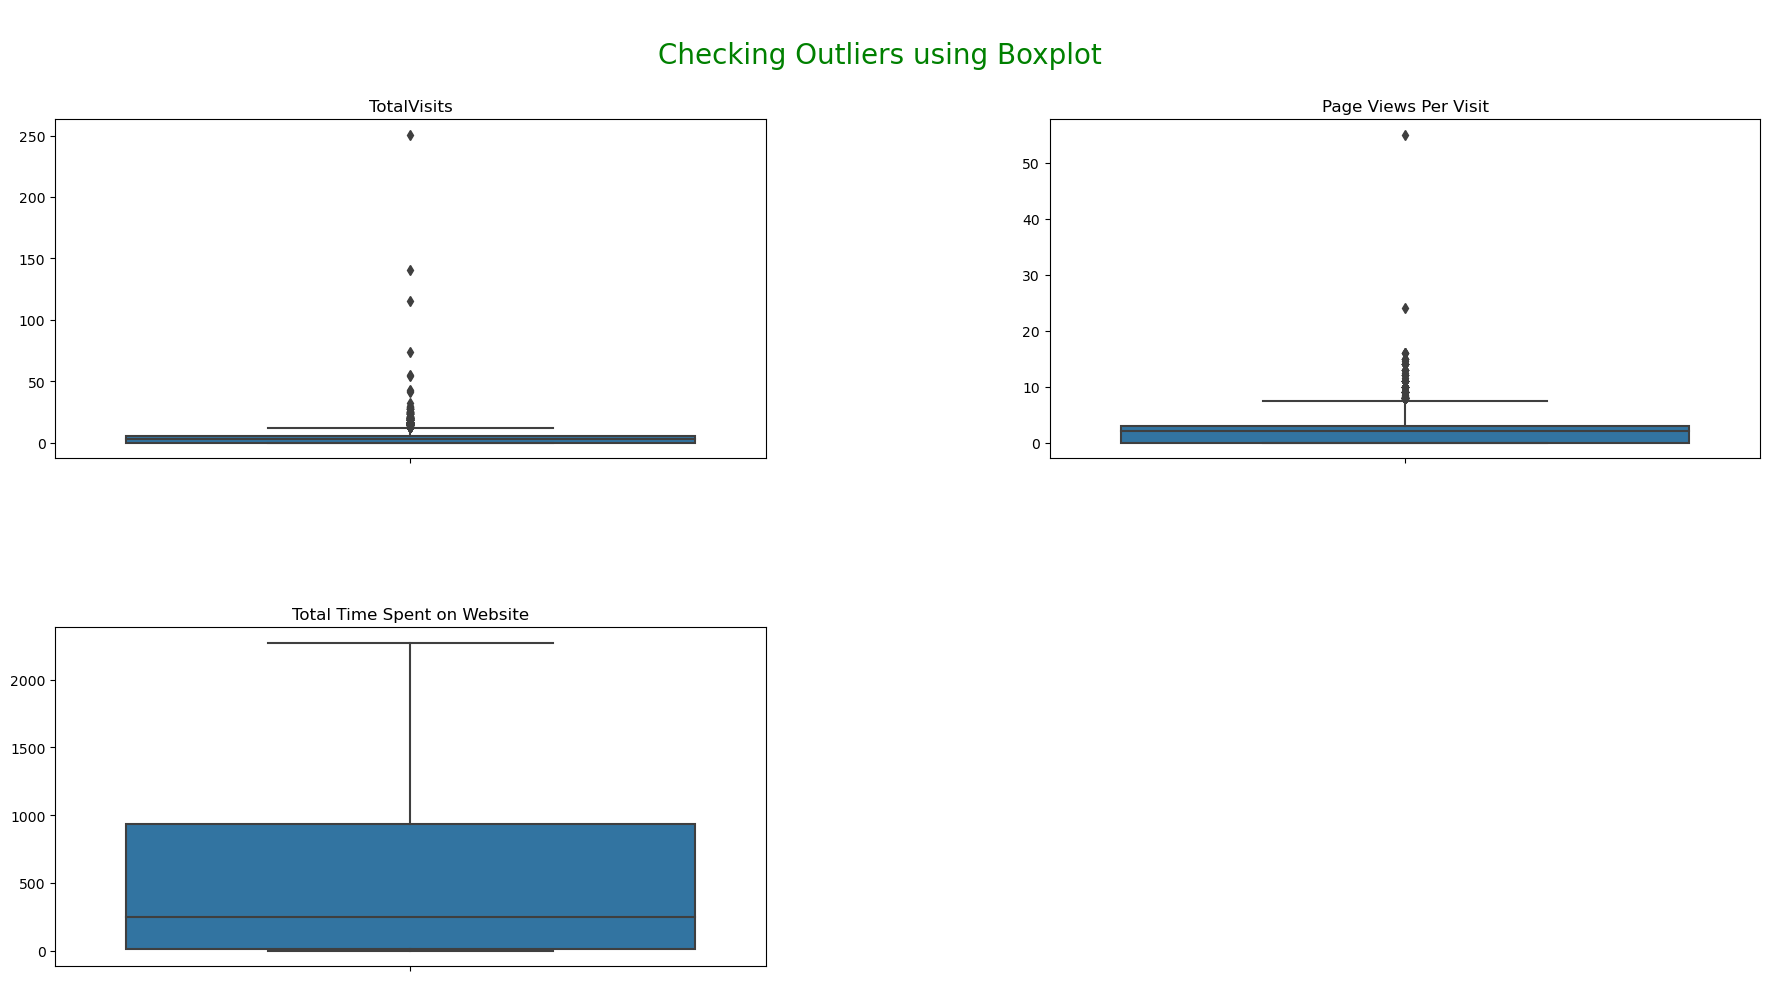

In [135]:
# Checking outliers for numerical variables other than target variable 
num_cols = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]

# UDF 
Check_Outliers(leadscore,num_cols)

TotalVisits,Page Views Per Visit: Both these variables contain outliers as can be seen in the boxplot
So, These outliers needs to be treated for these variables

#### Capping Outliers for the treatment

In [136]:
# before outlier treatment
leadscore.describe(percentiles=[.10,.25,.50,.75,.95])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.394156,487.698268,2.327787
std,0.486714,4.836682,548.021466,2.164258
min,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,12.000000,0.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
95%,1.000000,10.000000,1562.000000,6.000000
max,1.000000,251.000000,2272.000000,55.000000


In [137]:
# Defining UDF to treat outliers via capping and flooring

def Outlier_treatment(df,columnList):
    for i in columnList:
        q1 = df[i].describe()["25%"]
        q3 = df[i].describe()["75%"]
        IQR = q3 - q1

        upper_bound = q3 + 1.5*IQR
        lower_bound = q1 - 1.5*IQR

        # capping upper_bound
        df[i] = np.where(df[i] > upper_bound, upper_bound,df[i])

        # flooring lower_bound
        df[i] = np.where(df[i] < lower_bound, lower_bound,df[i])
        
        

In [138]:
# Checking outliers for numerical variables other than target variable 
capping_cols = ["TotalVisits","Page Views Per Visit"]

# UDF 
Outlier_treatment(leadscore,capping_cols)

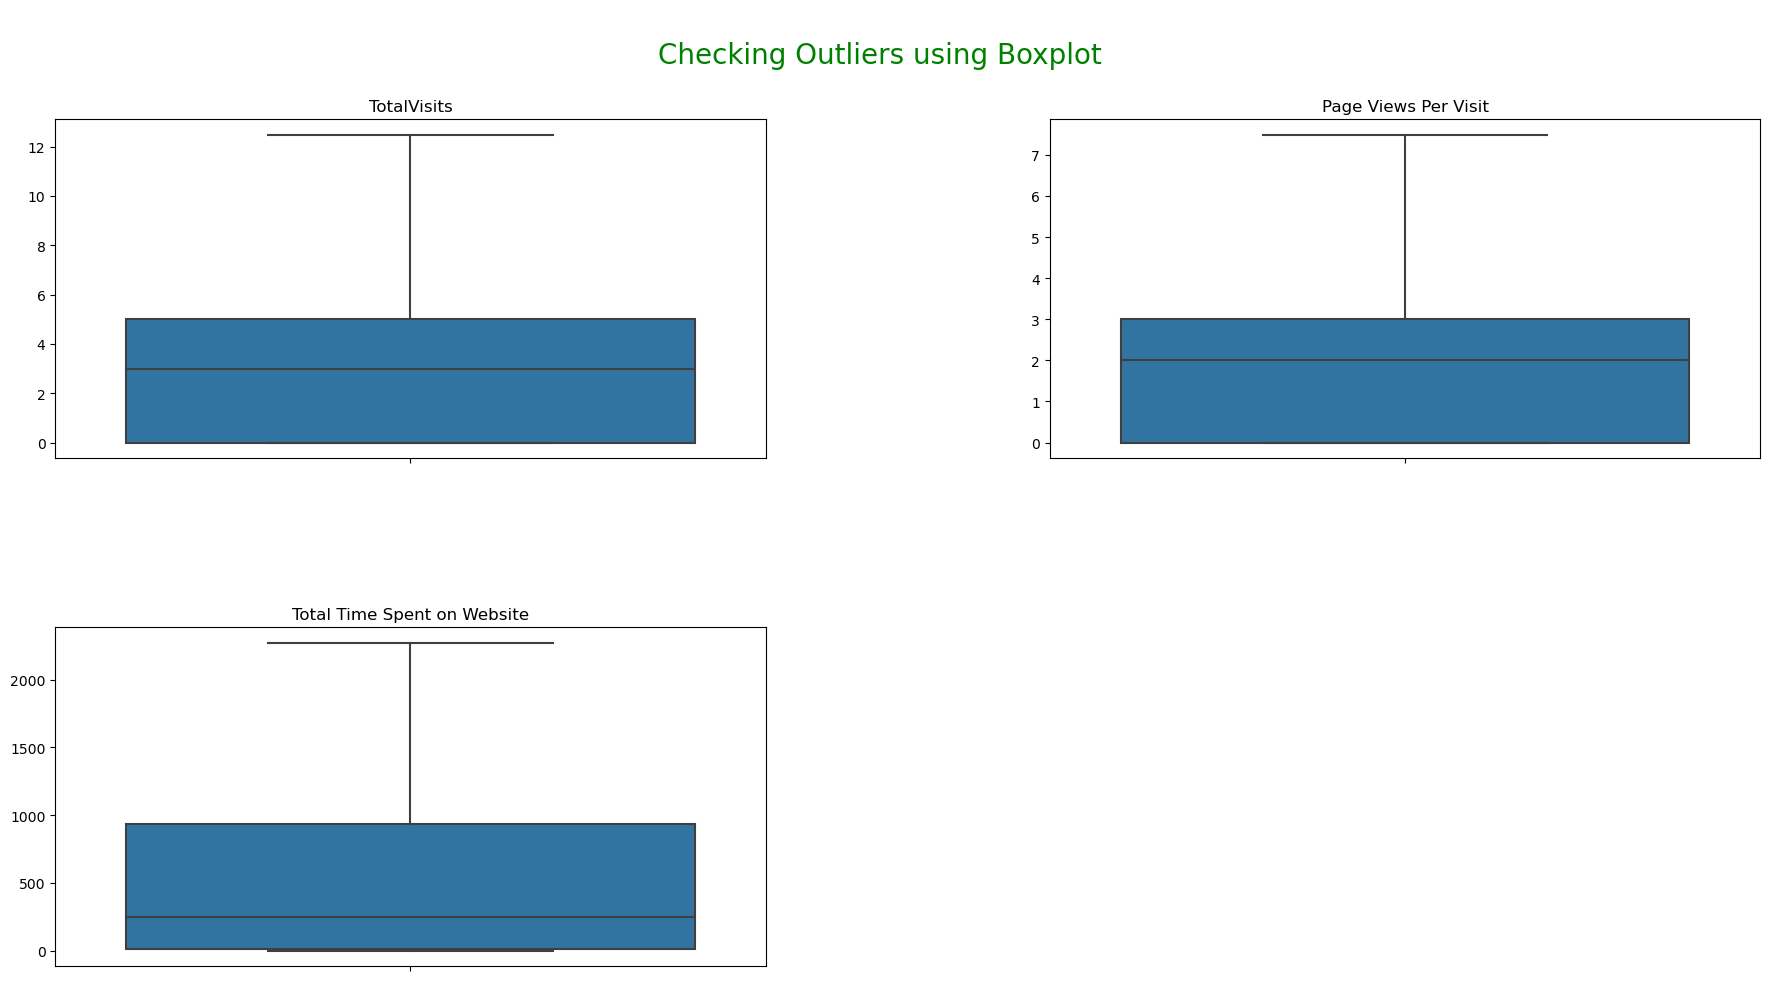

In [141]:
# Checking Boxplot after Outlier Treatment

num_cols = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]

# UDF for boxplot
Check_Outliers(leadscore,num_cols)

In [142]:
# after outlier treatment detailed percentile values
leadscore.describe(percentiles=[.10,.25,.50,.75,.95])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.213853,487.698268,2.274987
std,0.486714,3.005136,548.021466,1.917776
min,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,12.000000,0.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
95%,1.000000,10.000000,1562.000000,6.000000
max,1.000000,12.500000,2272.000000,7.500000




- Checking if entries in data are in correct format or not , casing styles (UPPER,lower)
- Checking data types of columns

In [143]:
leadscore.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,No
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,No
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,No


In [144]:
## Categorical Variables 

columnsList_cat = ["Lead Origin","Lead Source","Do Not Email","Last Activity","Specialization",
                  "What is your current occupation","A free copy of Mastering The Interview"]

for i in columnsList_cat:
        perc=100*leadscore[i].value_counts(normalize=True)
        print("value_counts % for :",i,"\n")
        print(perc,"\n")
        


value_counts % for : Lead Origin 

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64 

value_counts % for : Lead Source 

Google               31.428571
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
blog                  0.010823
NC_EDM                0.010823
Name: Lead Source, dtype: float64 

value_counts % for : D

-We've observed that certain categories in the "Lead Score" and "Last Activity" columns have limited entries. To avoid clutter when creating dummy variables, we intend to group these under "Others" for a cleaner organization.

-Additionally, we'll standardize the case for "Google" and "google" in the "Lead Source" to ensure consistency.

In [145]:
# Grouping low frequency value levels to Others
leadscore['Lead Source'] = leadscore['Lead Source'].replace(["bing","Click2call","Press_Release",
                                                           "Social Media","Live Chat","youtubechannel",
                                                           "testone","Pay per Click Ads","welearnblog_Home",
                                                           "WeLearn","blog","NC_EDM"],"Others")

# Changing google to Google
leadscore['Lead Source'] = leadscore['Lead Source'].replace("google","Google")

In [146]:
# value_counts percentage after replace
leadscore["Lead Source"].value_counts(normalize=True)*100

Google              31.482684
Direct Traffic      27.521645
Olark Chat          18.993506
Organic Search      12.489177
Reference            5.779221
Welingak Website     1.536797
Referral Sites       1.352814
Facebook             0.595238
Others               0.248918
Name: Lead Source, dtype: float64

In [147]:
# Grouping low frequency value levels to Others 
leadscore['Last Activity'] = leadscore['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                               'Had a Phone Conversation', 
                                                               'Approached upfront',
                                                               'View in browser link Clicked',       
                                                               'Email Marked Spam',                  
                                                               'Email Received','Visited Booth in Tradeshow',
                                                               'Resubscribed to emails'],'Others')

In [148]:
# value_counts percentage after replace
leadscore['Last Activity'].value_counts(normalize=True)*100

Email Opened                 38.311688
SMS Sent                     29.707792
Olark Chat Conversation      10.530303
Page Visited on Website       6.926407
Converted to Lead             4.632035
Email Bounced                 3.528139
Email Link Clicked            2.889610
Others                        2.218615
Form Submitted on Website     1.255411
Name: Last Activity, dtype: float64

"Do Not Email" & "Free_copy" both are binary categorical columns lets map both of them yes/no to 1/0

In [149]:
# Mapping binary categorical variables (Yes/No to 1/0) 
leadscore['Do Not Email'] = leadscore['Do Not Email'].apply(lambda x: 1 if x =='Yes' else 0)

leadscore['A free copy of Mastering The Interview'] = leadscore['A free copy of Mastering The Interview'].apply(lambda x: 1 if x =='Yes' else 0)

In [150]:
leadscore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   int64  
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  A free copy of Mastering The Interview  9240 non-null   int6

NOTE: The data types appear to be suitable and no modifications are necessary.

### 2.6 Data Imbalance 

Shape of All not Converted Leads - (5679, 11)
Shape of All Converted Lead - (3561, 11)
Imbalance Ratio is = 1.595


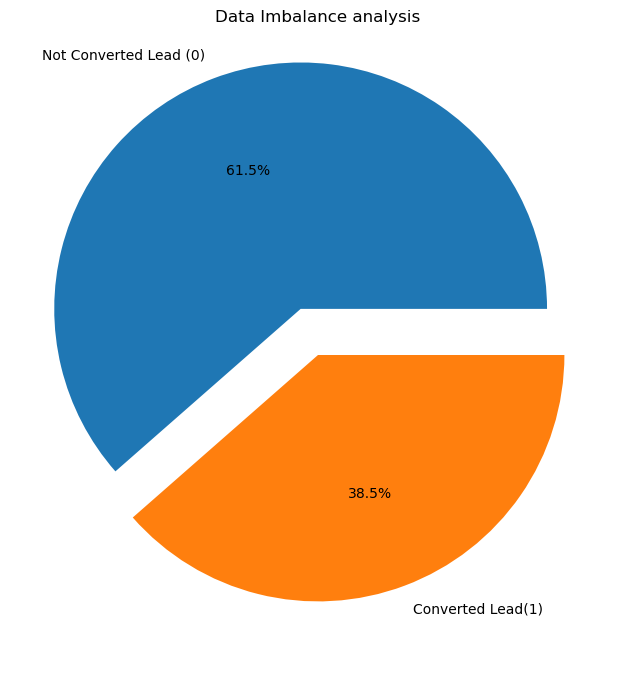

In [151]:
# Checking Data Imbalance
# Checking Imbalance of Data Converted_0 == 0(Lead not Converted) test_data1== 1 (Lead Converted)

Converted_0=leadscore[leadscore["Converted"]==0]
Converted_1=leadscore[leadscore["Converted"]==1]
print("Shape of All not Converted Leads -", Converted_0.shape)
print("Shape of All Converted Lead -", Converted_1.shape)
imbalance= round((Converted_0.shape[0])/(Converted_1.shape[0]),3)
print("Imbalance Ratio is =",imbalance)

# Checking data distribution using Pie Chart
plt.figure(figsize=[8,8])
myexplode=[0.2,0]
plt.pie([Converted_0.shape[0],Converted_1.shape[0]], labels=["Not Converted Lead (0)","Converted Lead(1)"], explode=myexplode, autopct='%1.1f%%')
plt.title("Data Imbalance analysis\n")
plt.show()



Conversion rate is of 38.5, meaning only 38.5% of the people have converted to leads.


In [152]:
### Ratio of Data Imbalance
ratio=(leadscore["Converted"].value_counts(normalize=True).loc[0])/(leadscore["Converted"].value_counts(normalize=True).loc[1])

print("Data Imbalance Ratio : {:.2f} : {}".format(ratio,1))

Data Imbalance Ratio : 1.59 : 1


In [153]:
leadscore.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,0


In [156]:
#List of categorical columns
cat_cols = ["Lead Origin","Do Not Email",'What is your current occupation',
            "A free copy of Mastering The Interview","Lead Source","Last Activity","Specialization"]

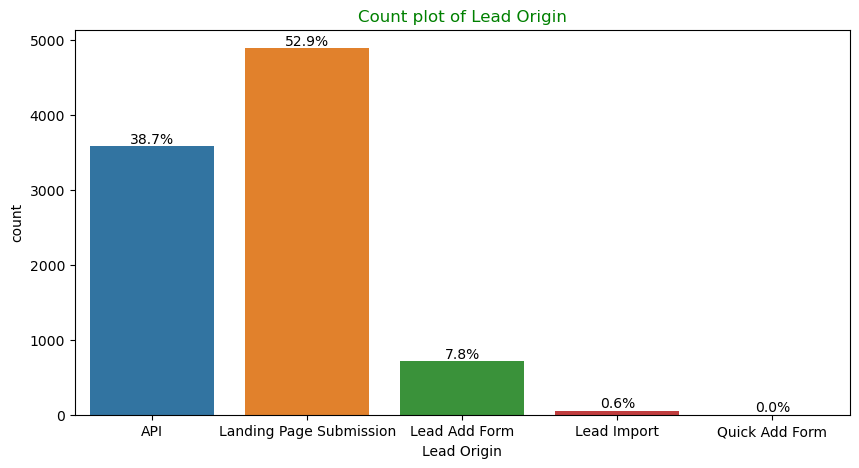

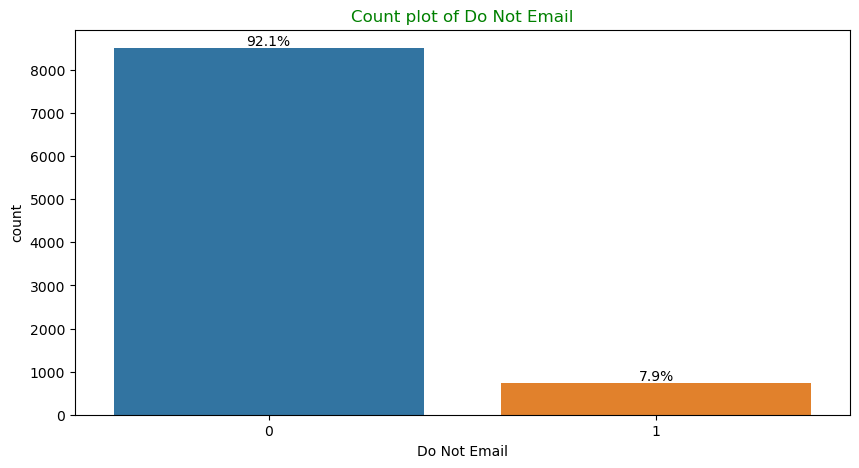

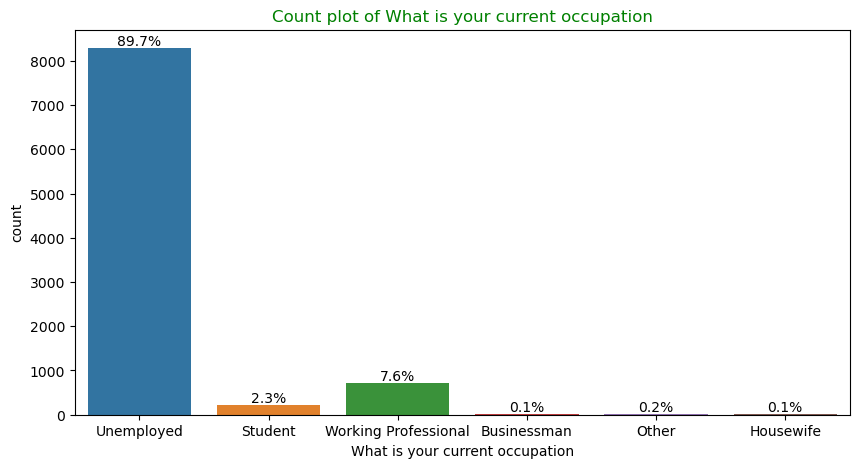

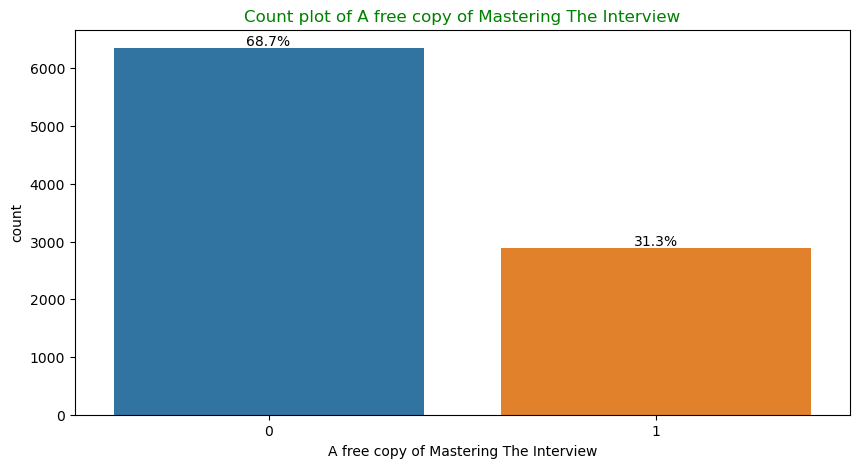

In [157]:
# countplot of columns with its value_counts percentage as annotation
for i in cat_cols[:4]:
    
    plt.figure(figsize=[10,5])
    plt.title("Count plot of {}".format(i),color="green")
    ax=sns.countplot(x=i,data=leadscore)
    total=len(leadscore[i])
    plt.xticks(rotation=0)
    
    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        
        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
        

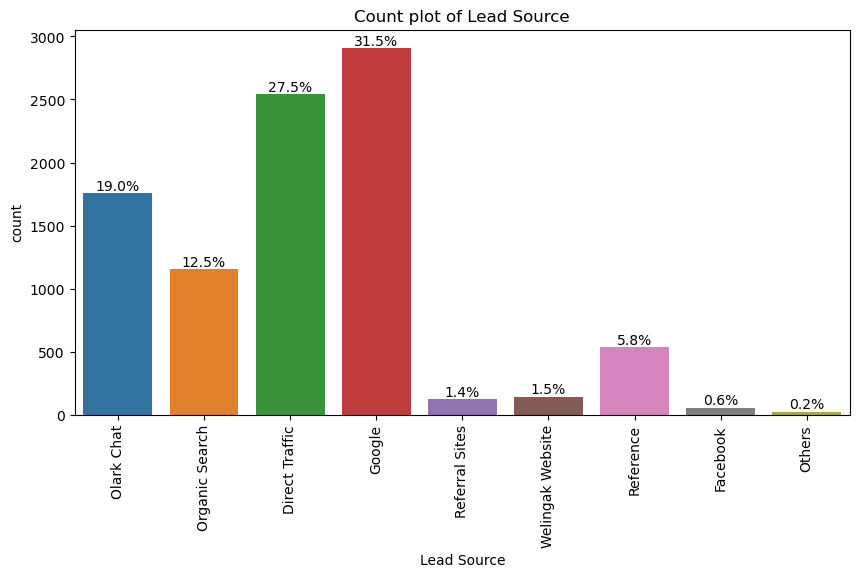

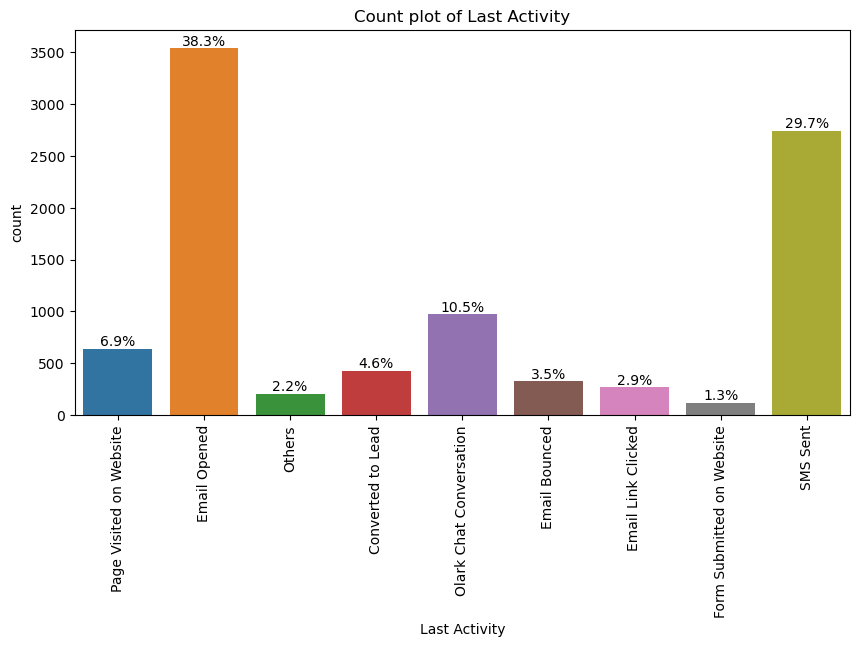

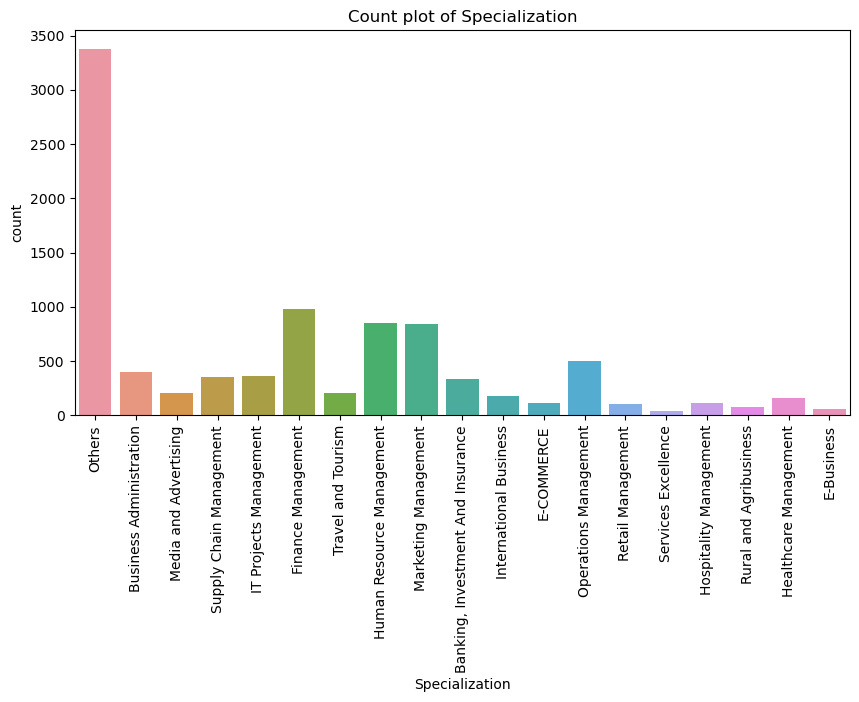

In [171]:
# Barplot for remaining columns from cat_cols (Did separate to rotate xticks 90* so labels doesnt become messy)
for i in cat_cols[4:]:
    
    plt.figure(figsize=[10,5])
    plt.title("Count plot of {}".format(i))
    ax=sns.countplot(x=i,data=leadscore)
    total=len(leadscore[i])
    plt.xticks(rotation=90)
    
    
    if i!="Specialization":        
        for p in ax.patches:
            text = '{:.1f}%'.format(100*p.get_height()/total)
            x = p.get_x() + p.get_width() / 2.
            y = p.get_height()

            ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    else:
        pass



- **Lead Origin:** "Landing Page Submission" identified 53% customers, "API" identified 39%. 

- **Current_occupation:** It has 90% of the customers as Unemployed

- **Do Not Email:** 92% of the people has opted that they dont want to be emailed about the course.

- **Lead Source:** 58% Lead source is from Google & Direct Traffic combined

- **Last Activity:** 68% of customers contribution in SMS Sent & Email Opened activities



In [172]:
# UDF "Bivariate_cat" tells comparision between Actual Distribution (value_count percentage) from the data and 
# 2nd graph tell the Lead Conversion Rate in percentage (how much leads are converted from 1st plot distribution)

def Bivariate_cat(df,variable_name,Target="Converted"):
    plt.figure(figsize=(20,6))
    plt.suptitle("{} Countplot vs Lead Conversion Rates".format(variable_name), fontsize=18)
    
    # 1st plot in subplot
    plt.subplot(1,2,1)
    plt.title("Distribution of {}".format(variable_name))
    ax=sns.countplot(x=variable_name,hue=Target,data=leadscore,alpha=0.46)
    
    total=len(leadscore[variable_name])
    plt.xticks(rotation=90)
    plt.legend(["No","Yes"],title = "Converted")
    
    # Annotation for 1st plot        
    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()

        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

    # 2nd plot
    plt.subplot(1,2,2)
    plt.title("Lead Conversion Rate of {}".format(variable_name),fontsize=12)
    ax=sns.countplot(x=variable_name,hue=Target,data=df,alpha=0.85)   #ax1 is for annotation
    
    # Modifications
    plt.xticks(rotation=90)
    plt.ylabel("Count")
    plt.xlabel("{}".format(variable_name))
    plt.legend(labels=["Not Converted","Converted"],title = "Lead Conversion Rate")
    
    # Annotation for 2nd plot
    # Calculate percentage above bars in countplot (Conversion rate)
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')


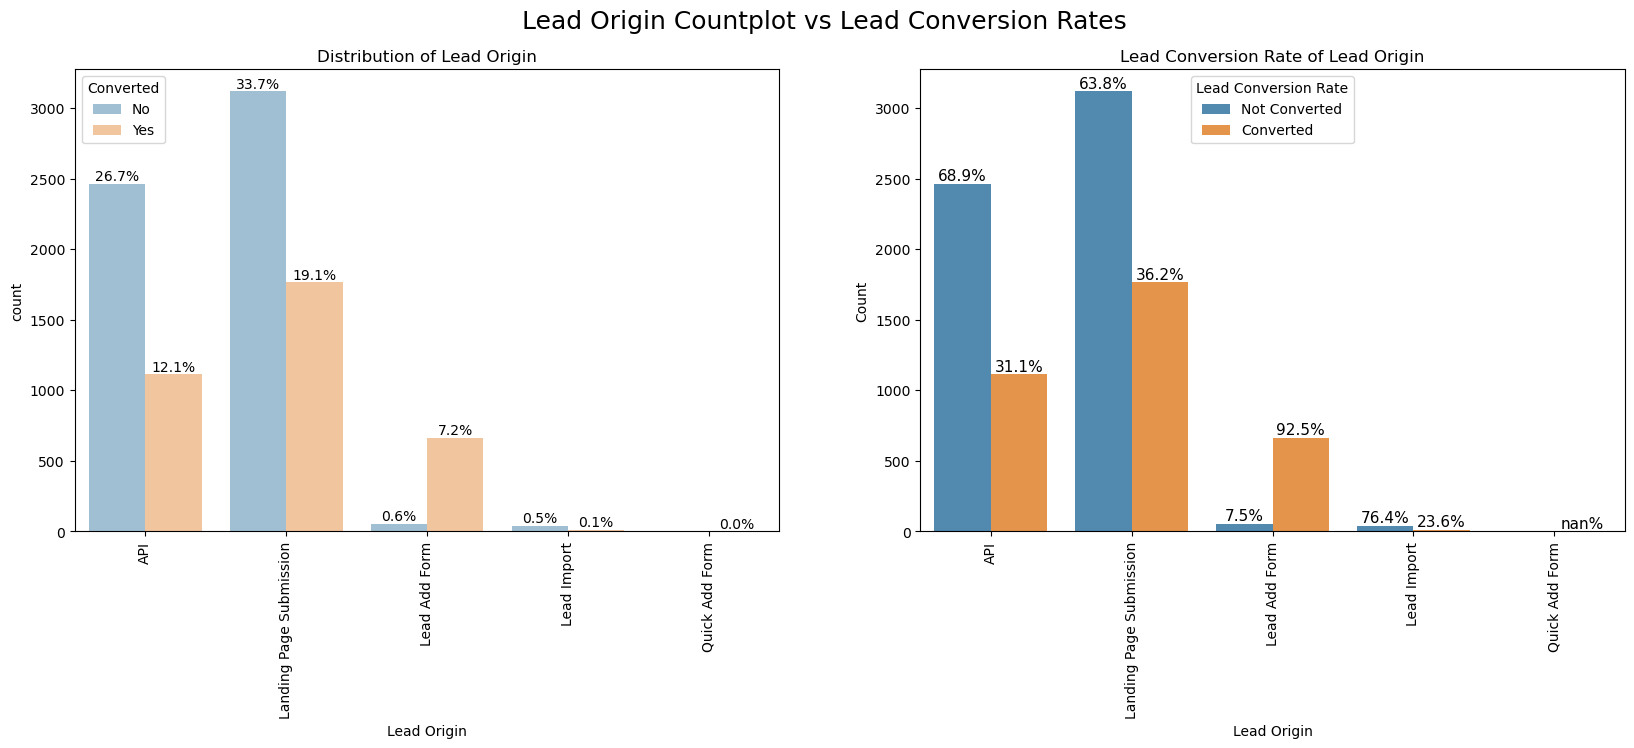

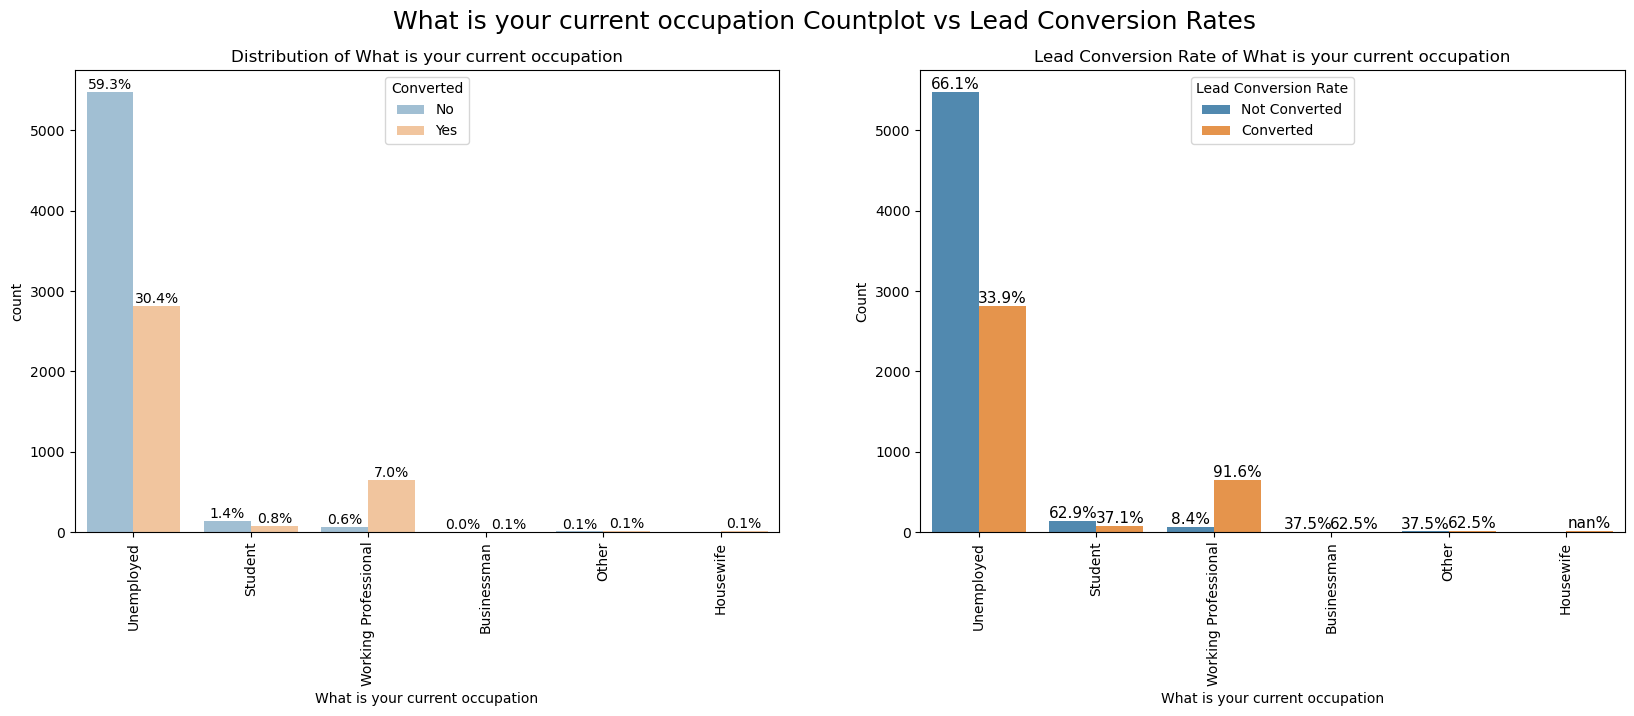

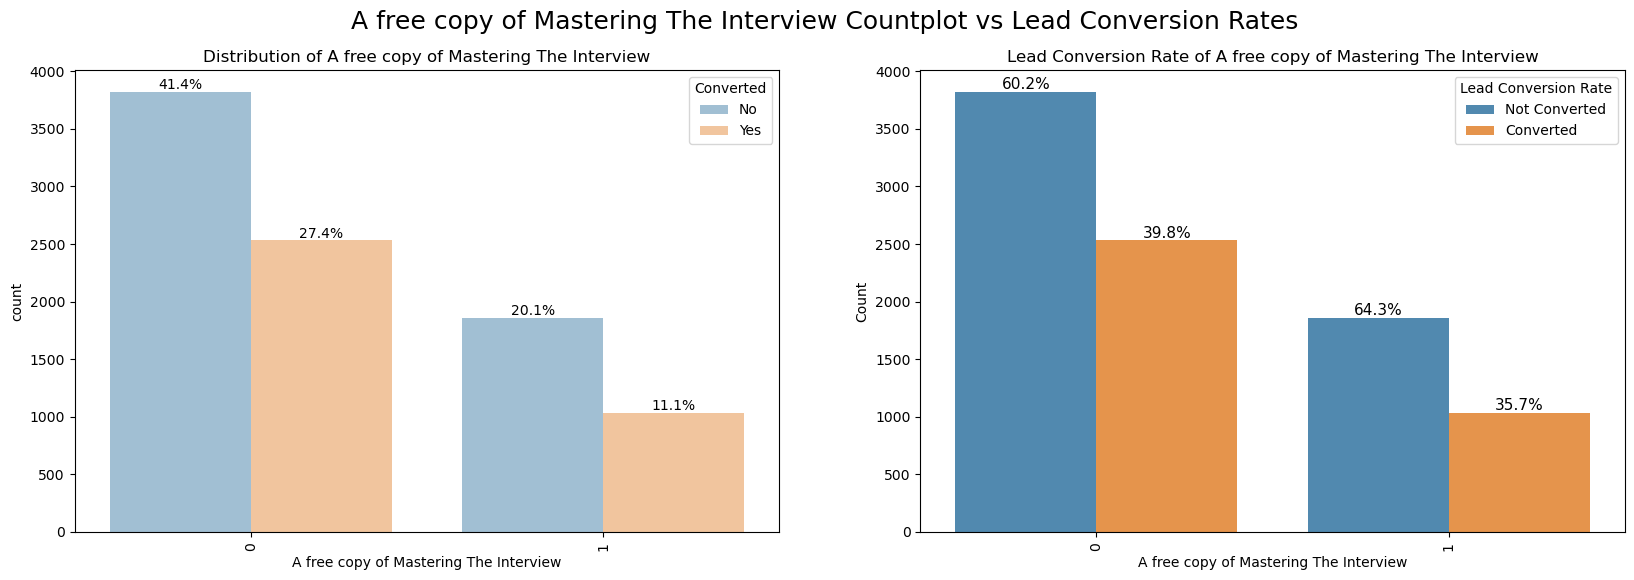

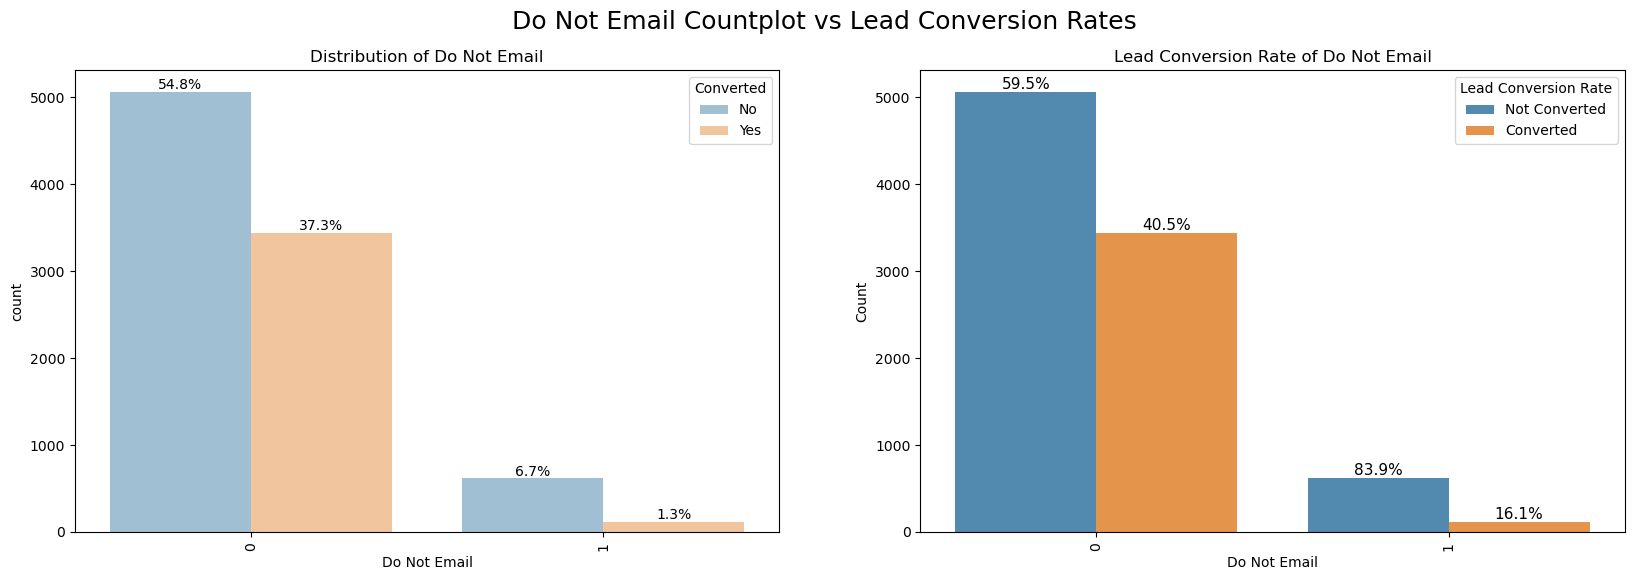

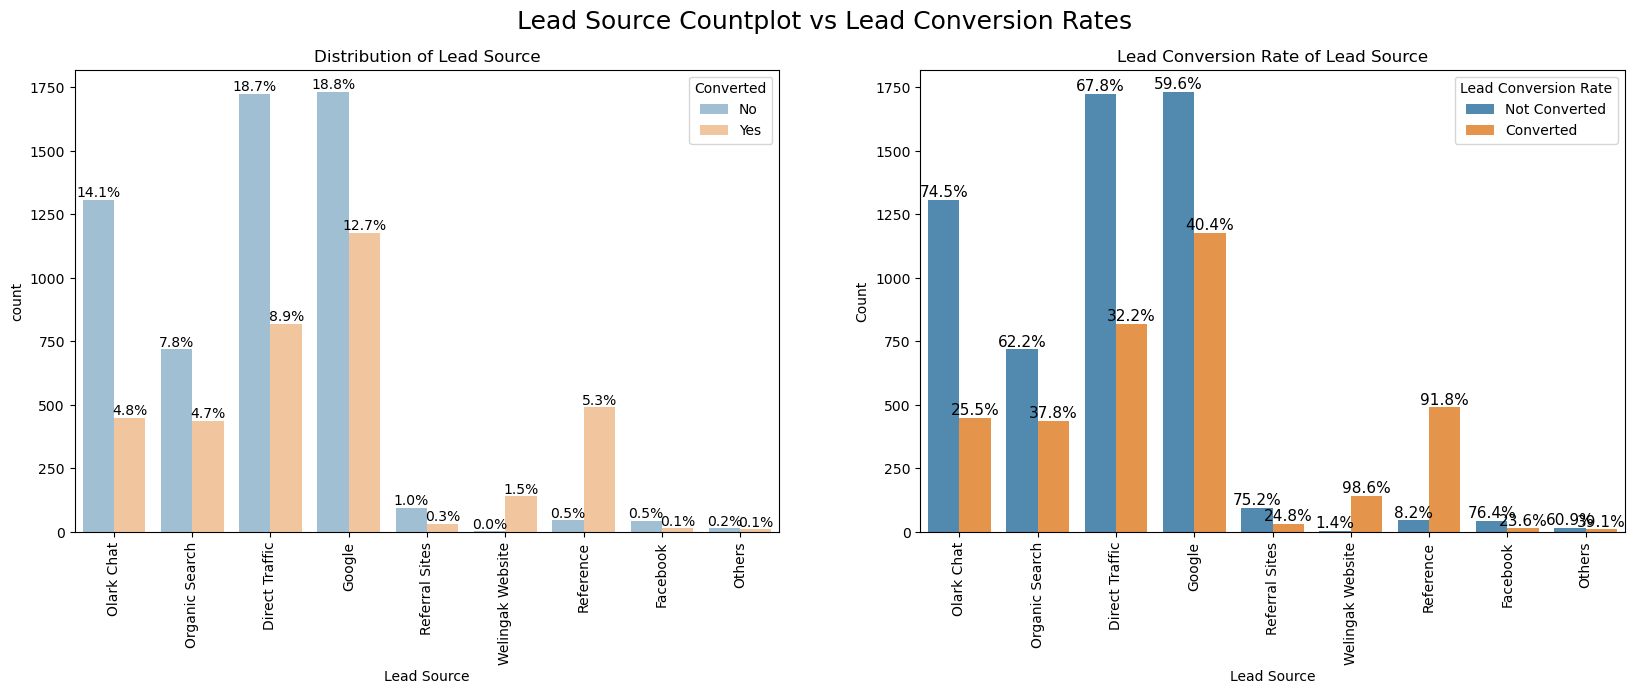

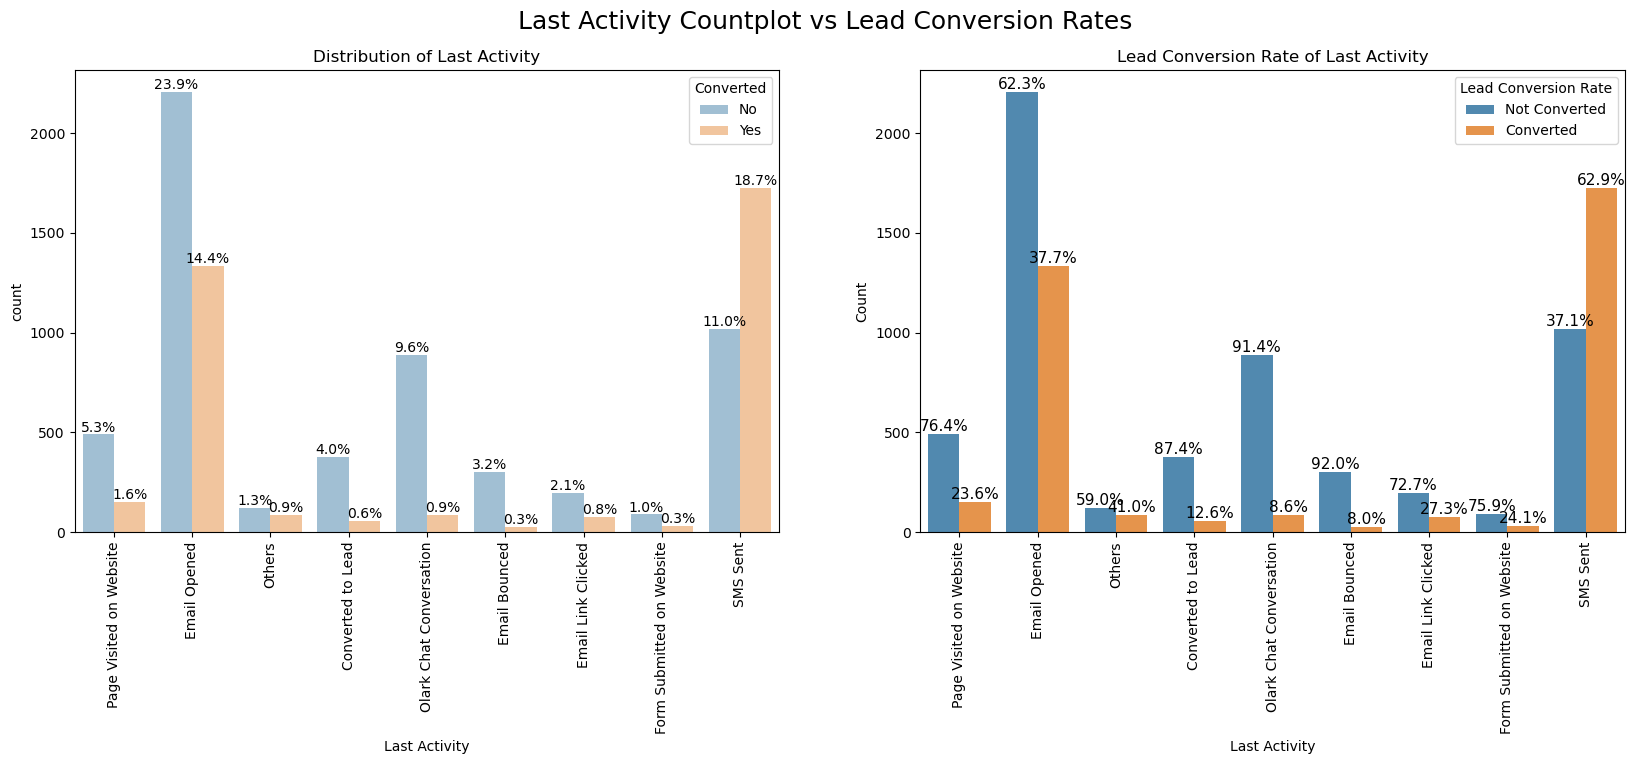

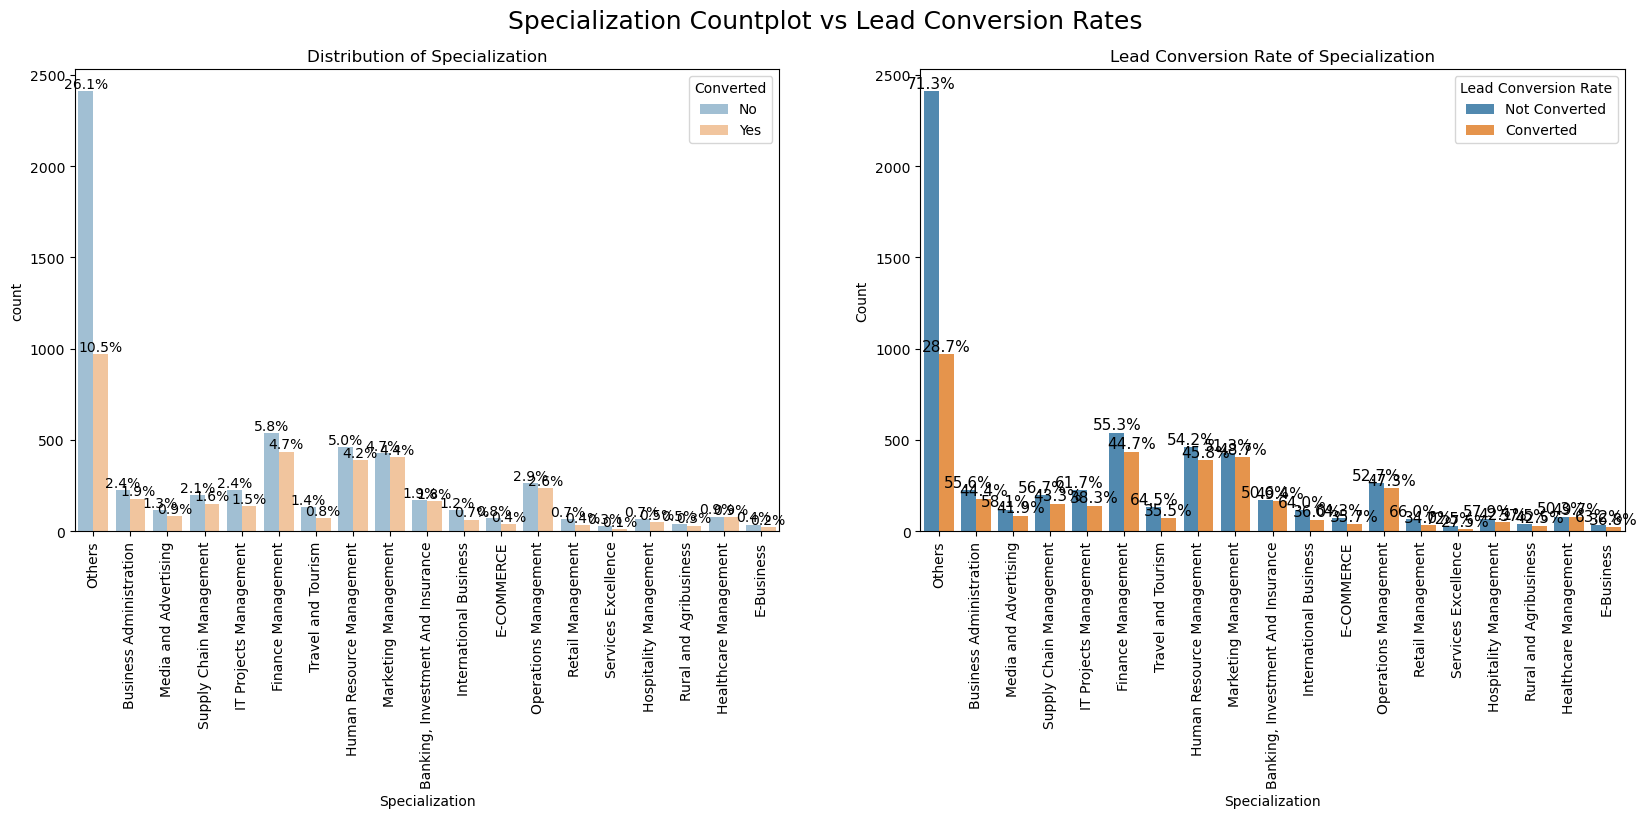

In [173]:
# Bivariate Analysis for all these variables using loop and UDF
# Comparision between variables w.r.t. 'Converted' (Target variable) , taking one categorical column w.r.t target variable as 'hue'
cat_cols = ["Lead Origin",'What is your current occupation',
            "A free copy of Mastering The Interview","Do Not Email",
            "Lead Source","Last Activity","Specialization"]

for i in cat_cols:
    Bivariate_cat(leadscore,variable_name=i)
    

Lead Origin:
"Landing Page Submission" generates 52% of leads with a 36% Lead Conversion Rate (LCR).The "API" identifies about 39% of leads with a 31% LCR.

Current Occupation: Approximately 90% of customers are unemployed, with a 34% LCR.
Working Professionals represent only 7.6% of customers but achieve an impressive 92% LCR.

Do Not Email: A significant 92% of individuals prefer not to receive course-related emails.

Lead Source: "Google" stands out with a 40% LCR from 31% of customers. "Direct Traffic" contributes 32% LCR but comprises 27% of customers. "Organic Search" yields a 37.8% LCR, although it's sourced from just 12.5% of customers. "Reference" boasts a remarkable 91% LCR, but it's associated with only around 6% of customers.

<Figure size 1600x400 with 0 Axes>

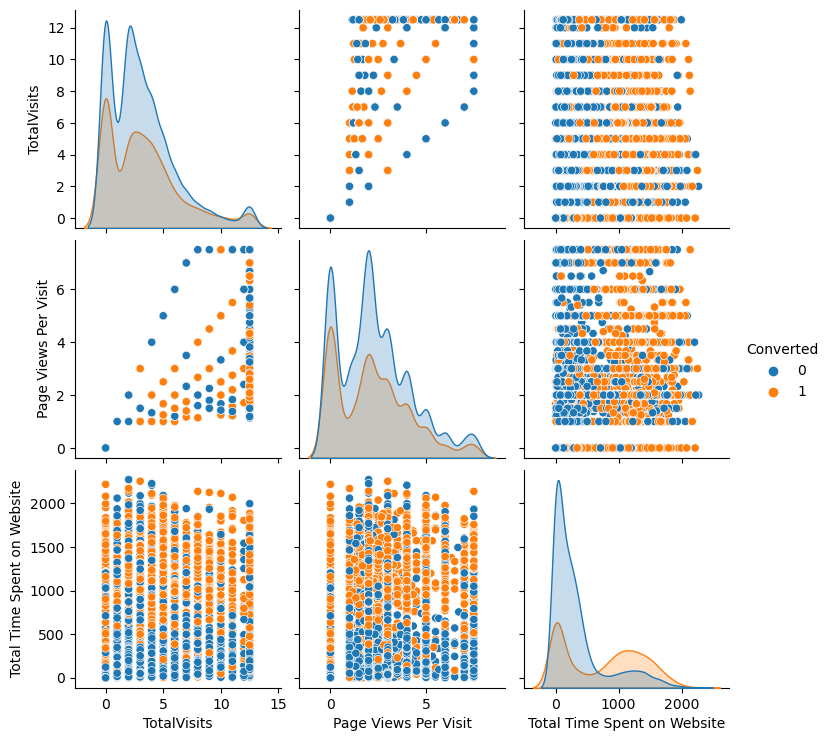

In [175]:
plt.figure(figsize=(16, 4))
sns.pairplot(data=leadscore,vars=num_cols,hue="Converted")                                  
plt.show()

In [61]:
num_cols =["Converted",'TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']

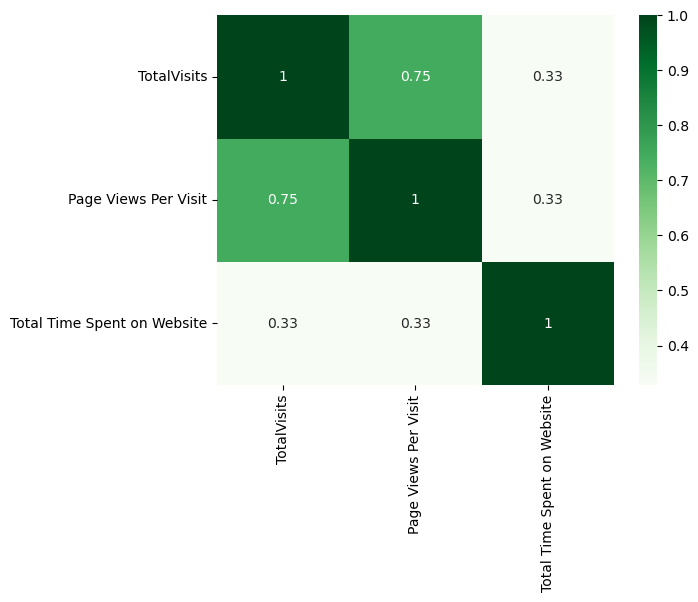

In [178]:
# Heatmap to show correlation between numerical variables
sns.heatmap(data=leadscore[num_cols].corr(),cmap="Greens",annot=True)
plt.show()

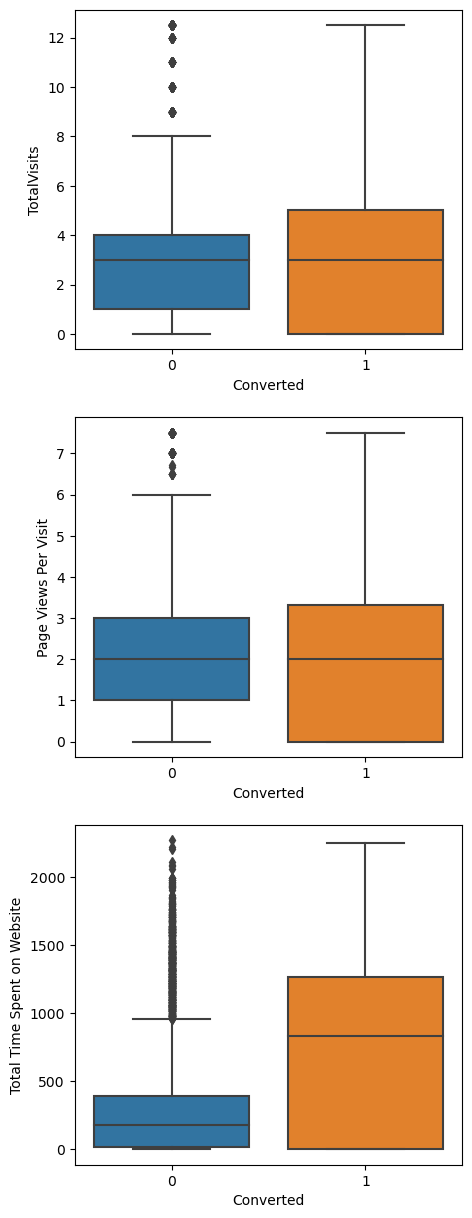

In [181]:
# Boxplot with Converted as hue

plt.figure(figsize=(5, 15))
plt.subplot(3,1,1)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leadscore)
plt.subplot(3,1,2)
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leadscore)
plt.subplot(3,1,3)
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leadscore)
plt.show()

 Past Leads who spends more time on Website are successfully converted than those who spends less as seen in the boxplot

## Step 3: Data Preparation for Model Training & Model Building


- Dummy creation
- Splitting the Data into Training and Testing Sets
- Scaling The Features

### 3.1 Dummy Variables
- For categorical variables with multiple levels, create dummy features (one-hot encoded)

Binary level categorical columns are already mapped to 1 / 0 in previous steps, So start with Dummy variable creation

In [185]:
leadscore.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,0


In [186]:

# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(leadscore[["Lead Origin","Lead Source","Last Activity","Specialization","What is your current occupation"]], drop_first=True)

# Adding the results to the master dataframe
leadscore = pd.concat([leadscore, dummy], axis=1)

In [187]:
leadscore.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [188]:
# We have created dummies for the below variables, so we can drop them

leadscore = leadscore.drop(["Lead Origin","Lead Source","Last Activity","Specialization",'What is your current occupation'],1)

In [189]:
leadscore.shape

(9240, 49)

In [190]:
leadscore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 49 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          9240 non-null   int64  
 1   Converted                                             9240 non-null   int64  
 2   TotalVisits                                           9240 non-null   float64
 3   Total Time Spent on Website                           9240 non-null   int64  
 4   Page Views Per Visit                                  9240 non-null   float64
 5   A free copy of Mastering The Interview                9240 non-null   int64  
 6   Lead Origin_Landing Page Submission                   9240 non-null   uint8  
 7   Lead Origin_Lead Add Form                             9240 non-null   uint8  
 8   Lead Origin_Lead Import                               9240

### 3.2 Test-Train Split

In [191]:
# Putting predictor variables to X
X = leadscore.drop('Converted', axis=1)

# Putting Target variables to y
y = leadscore["Converted"]


In [192]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [193]:
print("X_train:", X_train.shape,"\ny_train:",y_train.shape)

X_train: (6468, 48) 
y_train: (6468,)


In [194]:
print("X_test:", X_test.shape,"\ny_test:",y_test.shape)

X_test: (2772, 48) 
y_test: (2772,)


### 3.3 Feature Scaling 

In [195]:
# using standard scaler for scaling the features
scaler = StandardScaler()

# fetching int64 and float64 dtype columns from dataframe for scaling
num_cols=X_train.select_dtypes(include=['int64','float64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])


In [196]:
# X-train dataframe after standard scaling
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
1871,-0.291638,-1.064974,-0.885371,-1.184892,-0.673169,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
6795,-0.291638,0.262370,0.005716,-0.488713,1.485511,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3516,-0.291638,0.594206,-0.691418,0.123715,-0.673169,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
8105,-0.291638,0.594206,1.365219,1.432322,-0.673169,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3934,-0.291638,-1.064974,-0.885371,-1.184892,-0.673169,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [198]:
# Checking the Lead Conversion Rate (LCR) - "Converted" is our Target Variable
# We will denote Lead Conversion Rate with 'LCR' as its short form

LCR = (sum(leadscore['Converted'])/len(leadscore['Converted'].index))*100
LCR

38.53896103896104

 We have 38.5% Conversion Rate


- Feature elimination based on correlations

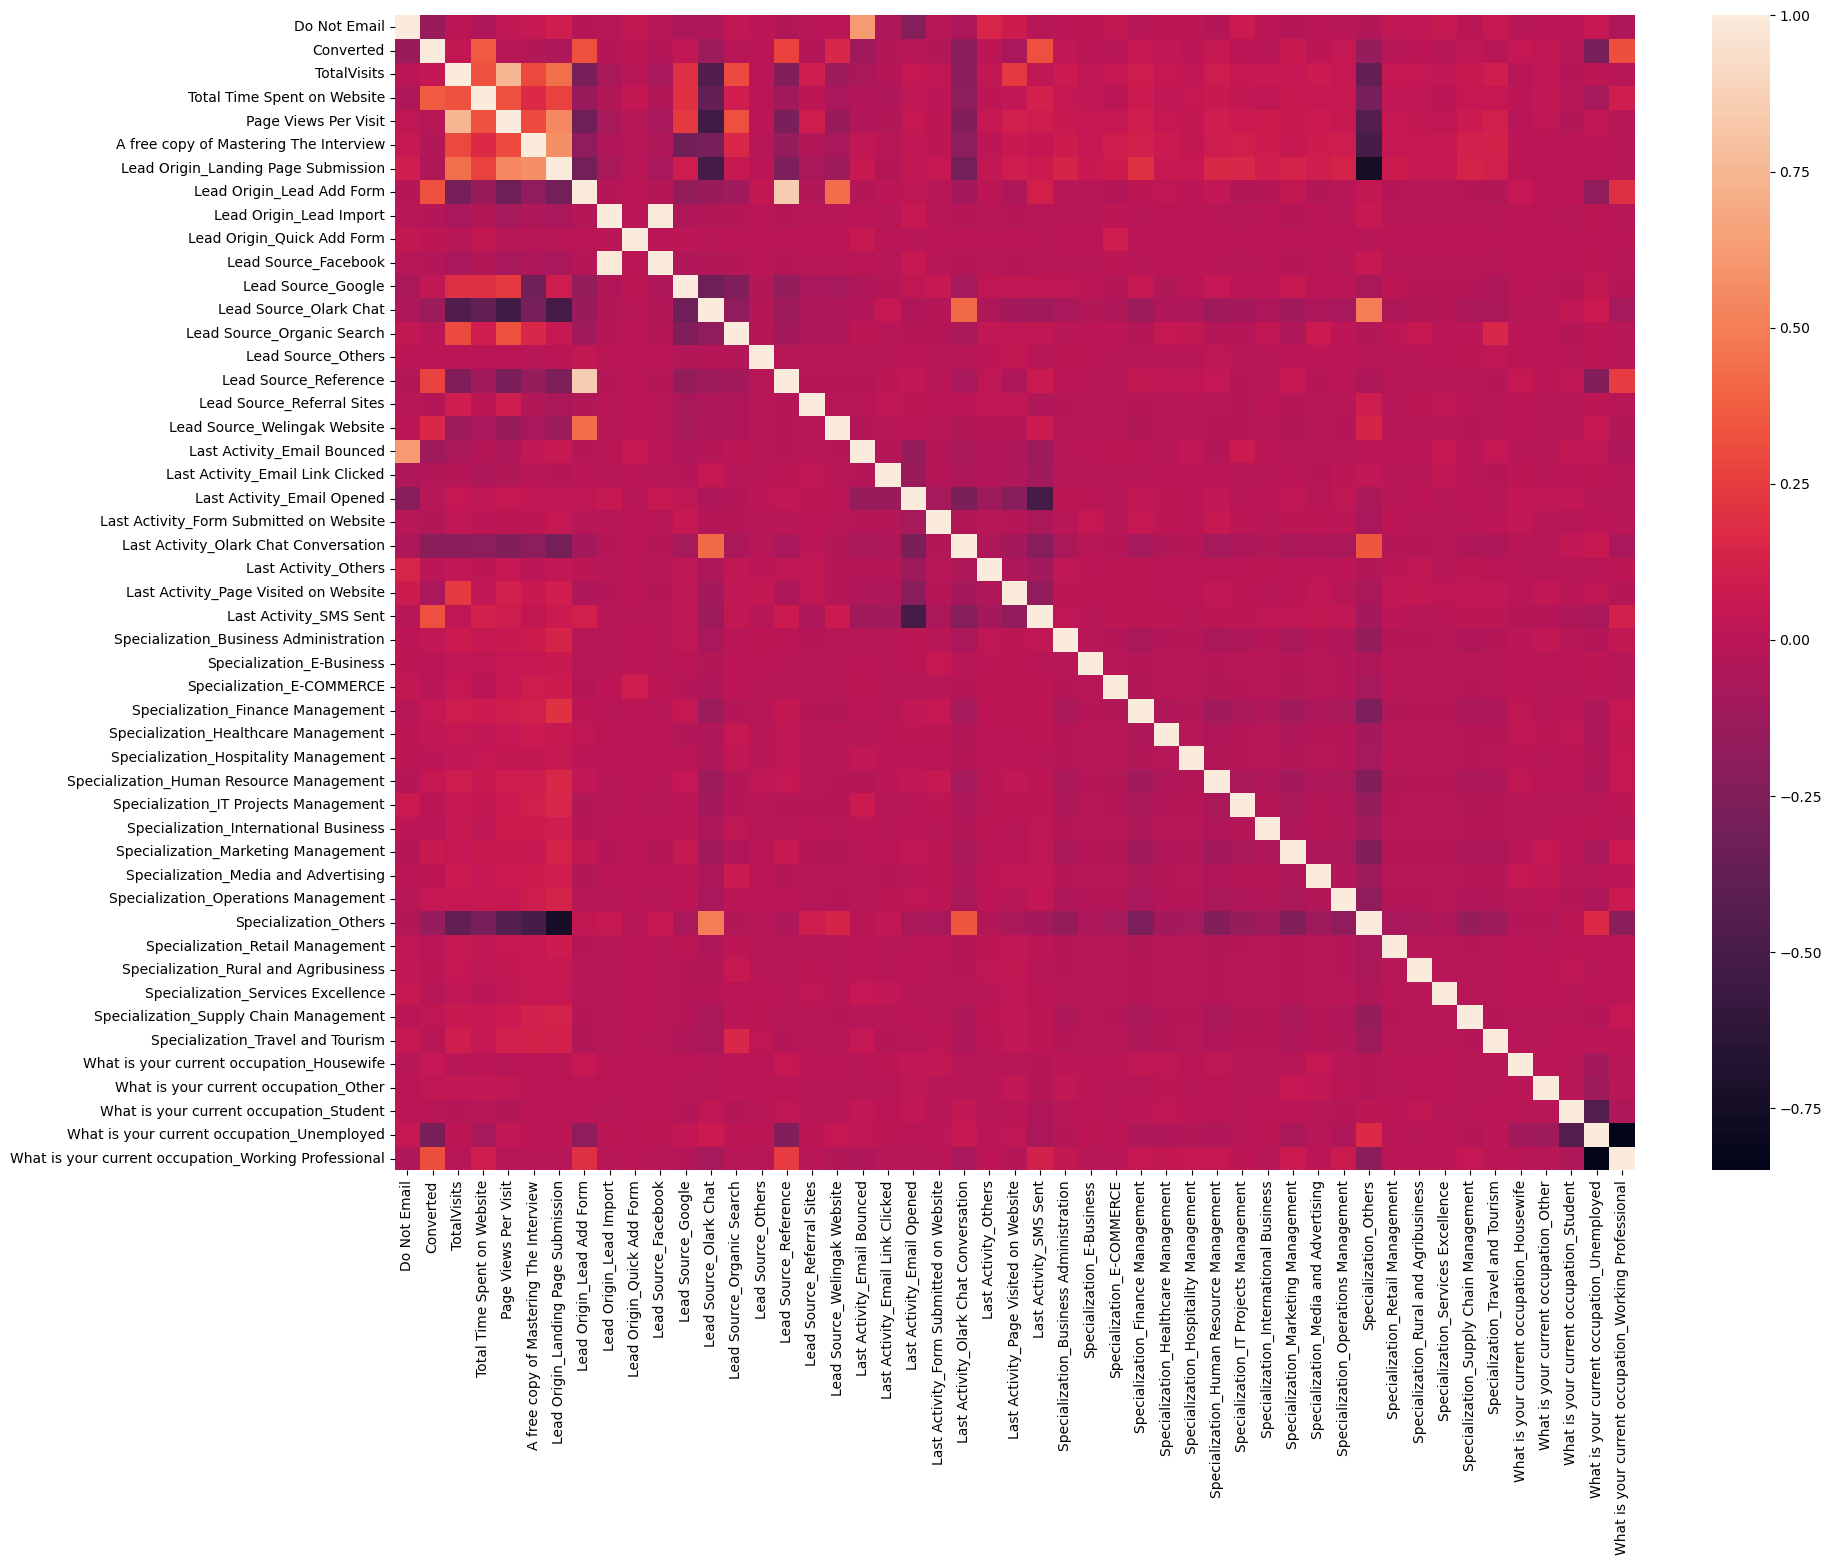

In [200]:
# analyse correlation matrix
plt.figure(figsize = (20,15))        
sns.heatmap(leadscore.corr())
plt.show()

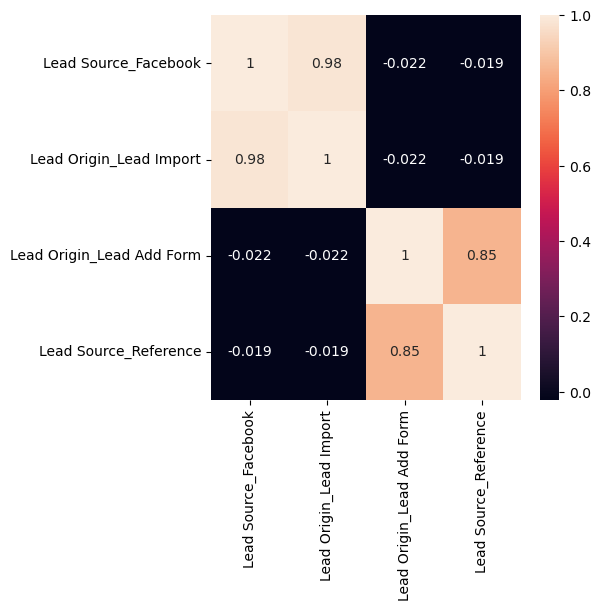

In [201]:
# as the above heatmap has so many columns lets breakdown suspected variables which migh have high correlation with each other
# analysing variables which might be highly correlated with each other from same class from above graph
plt.figure(figsize = (5,5))        
sns.heatmap(leadscore[["Lead Source_Facebook","Lead Origin_Lead Import","Lead Origin_Lead Add Form","Lead Source_Reference"]].corr(),annot=True)
plt.show()

The predictor variables are strongly correlated, with coefficients near 0.98 and 0.85. To enhance the model's simplicity and avoid redundancy, we should remove one variable from each correlated pair. As a result, we can drop both 'Lead Origin_Lead Import' and 'Lead Origin_Lead Add Form'.

In [202]:
X_test = X_test.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],1)

X_train = X_train.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],1)

## Step 4: Model Building 

- We will Build Logistic Regression Model for predicting categorical variable
- Feature Selection Using RFE (Coarse tuning)
- Manual fine-tuning using p-values and VIFs

### 4.1 Feature Selection Using RFE (Recursive Feature Elimination)

In [203]:
# Lets use RFE to reduce variables 
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=15)            
rfe = rfe.fit(X_train, y_train)

In [204]:
#checking the output of RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 11),
 ('TotalVisits', False, 9),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 10),
 ('A free copy of Mastering The Interview', False, 18),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Quick Add Form', False, 19),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 22),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 28),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 24),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 14),
 ('Last Activity_Email Link Clicked', False, 6),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 29),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 12),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Busi

In [205]:
# instead of using as zip using this for more readablility

# Check the top 15 features chosen by RFE
top15=pd.DataFrame()
top15['features']=X_train.columns
top15['Feature Chosen'] = rfe.support_
top15['Ranking']=rfe.ranking_
top15.sort_values(by='Ranking')

,features,Feature Chosen,Ranking
22,Last Activity_SMS Sent,True,1
41,What is your current occupation_Housewife,True,1
35,Specialization_Others,True,1
28,Specialization_Hospitality Management,True,1
20,Last Activity_Others,True,1
19,Last Activity_Olark Chat Conversation,True,1
17,Last Activity_Email Opened,True,1
14,Lead Source_Welingak Website,True,1
12,Lead Source_Reference,True,1
11,Lead Source_Others,True,1


In [206]:
# columns which are selected by RFE
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Source_Facebook', 'Lead Source_Olark Chat', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [207]:
# columns which are not selected by RFE
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead Origin_Quick Add Form',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Special

In [208]:
# User defined function for calculating VIFs for variables
def get_vif(model_df):
    X = pd.DataFrame()
    X['Features'] = model_df.columns
    X['VIF'] = [variance_inflation_factor(model_df.values, i) for i in range(model_df.shape[1])]
    X['VIF'] = round(X['VIF'], 2)
    X = X.sort_values(by='VIF', ascending=False)
    X = X.reset_index(drop=True)
    return X

### Model 1

In [209]:
# Building model using statsmodels, for the detailed statistics

# columns selected by RFE to be used for this model 
rfe_col=X_train.columns[rfe.support_]

# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm1 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm1 = sm.GLM(y_train,X_train_sm1,family = sm.families.Binomial()).fit()  

logm1.params

const                                                   -1.033284
Total Time Spent on Website                              1.050544
Lead Origin_Landing Page Submission                     -1.272090
Lead Source_Facebook                                    -0.696059
Lead Source_Olark Chat                                   0.900083
Lead Source_Others                                       0.980708
Lead Source_Reference                                    2.897685
Lead Source_Welingak Website                             5.380227
Last Activity_Email Opened                               0.950623
Last Activity_Olark Chat Conversation                   -0.553411
Last Activity_Others                                     1.258012
Last Activity_SMS Sent                                   2.068763
Specialization_Hospitality Management                   -1.072037
Specialization_Others                                   -1.193681
What is your current occupation_Housewife               23.022209
What is yo

In [210]:
#Let's see the summary of our logistic regression model
print(logm1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2732.8
Date:                Tue, 24 Oct 2023   Deviance:                       5465.5
Time:                        11:22:45   Pearson chi2:                 8.09e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3839
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

"Current_occupation_Housewife" column will be removed from model due to high p-value of 0.999, which is above the accepted threshold of 0.05 for statistical significance.

### Model 2

In [212]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm2 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm2 = sm.GLM(y_train,X_train_sm2,family = sm.families.Binomial()).fit()  

logm2.params

const                                                   -1.033284
Total Time Spent on Website                              1.050544
Lead Origin_Landing Page Submission                     -1.272090
Lead Source_Facebook                                    -0.696059
Lead Source_Olark Chat                                   0.900083
Lead Source_Others                                       0.980708
Lead Source_Reference                                    2.897685
Lead Source_Welingak Website                             5.380227
Last Activity_Email Opened                               0.950623
Last Activity_Olark Chat Conversation                   -0.553411
Last Activity_Others                                     1.258012
Last Activity_SMS Sent                                   2.068763
Specialization_Hospitality Management                   -1.072037
Specialization_Others                                   -1.193681
What is your current occupation_Housewife               23.022209
What is yo

In [213]:
#Let's see the summary of our logistic regression model
print(logm2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2732.8
Date:                Tue, 24 Oct 2023   Deviance:                       5465.5
Time:                        11:23:39   Pearson chi2:                 8.09e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3839
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

"Lead Source_Facebook" column will be removed from model due to high p-value of 0.187, which is above the accepted threshold of 0.05 for statistical significance.

### Model 3

In [214]:
# Dropping 'Lead Source_Facebook' column
rfe_col=rfe_col.drop("Lead Source_Facebook")

In [215]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm3 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm3 = sm.GLM(y_train,X_train_sm3,family = sm.families.Binomial()).fit()  

logm3.params

const                                                   -1.048710
Total Time Spent on Website                              1.053004
Lead Origin_Landing Page Submission                     -1.254068
Lead Source_Olark Chat                                   0.917956
Lead Source_Others                                       0.988201
Lead Source_Reference                                    2.917719
Lead Source_Welingak Website                             5.397746
Last Activity_Email Opened                               0.944999
Last Activity_Olark Chat Conversation                   -0.553328
Last Activity_Others                                     1.258532
Last Activity_SMS Sent                                   2.065472
Specialization_Hospitality Management                   -1.082923
Specialization_Others                                   -1.190230
What is your current occupation_Housewife               23.023719
What is your current occupation_Working Professional     2.683792
dtype: flo

In [216]:
#Let's see the summary of our logistic regression model
print(logm3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2733.7
Date:                Tue, 24 Oct 2023   Deviance:                       5467.4
Time:                        11:23:52   Pearson chi2:                 8.09e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3837
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

"Lead Source_Others" column will be removed from model due to high p-value of 0.055, which is above the accepted threshold of 0.05 for statistical significance.

### Model 4

In [217]:
# Dropping 'Lead Source_Facebook' column
rfe_col=rfe_col.drop("Lead Source_Others")

In [218]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm4 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm4 = sm.GLM(y_train,X_train_sm4,family = sm.families.Binomial()).fit()  

logm4.params

const                                                   -1.031602
Total Time Spent on Website                              1.050944
Lead Origin_Landing Page Submission                     -1.263769
Lead Source_Olark Chat                                   0.908112
Lead Source_Reference                                    2.905848
Lead Source_Welingak Website                             5.389647
Last Activity_Email Opened                               0.943646
Last Activity_Olark Chat Conversation                   -0.550690
Last Activity_Others                                     1.262880
Last Activity_SMS Sent                                   2.061737
Specialization_Hospitality Management                   -1.087051
Specialization_Others                                   -1.199302
What is your current occupation_Housewife               23.017356
What is your current occupation_Working Professional     2.677711
dtype: float64

In [219]:
#Let's see the summary of our logistic regression model
print(logm4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2735.5
Date:                Tue, 24 Oct 2023   Deviance:                       5471.0
Time:                        11:23:56   Pearson chi2:                 8.08e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3834
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

 Model 4 is stable and has significant p-values within the threshold (p-values < 0.05), so we will use it for further analysis.

- Now lets check VIFs for these variables to check if there is any multicollinearity which exists among the independent variables

In [220]:
# Now checking VIFs for all variables in the Model 4 
get_vif(X_train_rfe)

,Features,VIF
0,Specialization_Others,2.47
1,Lead Origin_Landing Page Submission,2.46
2,Last Activity_Email Opened,2.36
3,Last Activity_SMS Sent,2.20
4,Lead Source_Olark Chat,2.14
5,Last Activity_Olark Chat Conversation,1.72
6,Lead Source_Reference,1.32
7,Total Time Spent on Website,1.24
8,What is your current occupation_Working Profes...,1.21
9,Lead Source_Welingak Website,1.08


 No variable needs to be dropped as they all have good VIF values less than 5.
- p-values for all variables is less than 0.05
- This model looks acceptable as everything is under control (p-values & VIFs).
- So we will final our Model 4 for `Model Evaluation`.

## Step 5: Model Evaluation

- Confusion Matrix
- Accuracy
- Sensitivity and Specificity
- Threshold determination using ROC & Finding Optimal cutoff point
- Precision and Recall

In [221]:
# Getting the predicted values on the train set
y_train_pred = logm4.predict(X_train_sm4)           # giving prob. of getting 1

y_train_pred[:10]

1871    0.472448
6795    0.072762
3516    0.248657
8105    0.768727
3934    0.212550
4844    0.987894
3297    0.107288
8071    0.996089
987     0.168799
7423    0.870563
dtype: float64

In [222]:
# for array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.47244807, 0.0727618 , 0.24865708, 0.76872657, 0.2125502 ,
       0.9878942 , 0.10728788, 0.99608919, 0.16879879, 0.87056328])

In [223]:
# Creating a dataframe with the actual churn flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

# y_train.values actual Converted values from df_leads dataset
# y_train_pred probability of Converted values predicted by model

,Converted,Converted_Prob,Prospect ID
0,0,0.472448,1871
1,0,0.072762,6795
2,0,0.248657,3516
3,0,0.768727,8105
4,0,0.212550,3934


 Now we have to find the optimal cutoff Threshold value of Probability. Let's start with default 0.5 value and add a new feature predicted in above dataframe using the probabilities

In [224]:
y_train_pred_final['Predicted'] = y_train_pred_final["Converted_Prob"].map(lambda x: 1 if x > 0.5 else 0)

# checking head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted
0,0,0.472448,1871,0
1,0,0.072762,6795,0
2,0,0.248657,3516,0
3,0,0.768727,8105,1
4,0,0.212550,3934,0


### 5.1 Confusion Matrix

In [225]:
# Confusion matrix  (Actual / predicted)

confusion = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["Predicted"])
print(confusion)

[[3588  414]
 [ 844 1622]]


In [226]:
# Predicted        not_converted  |  converted
# Actual                          |
# -----------------------------------------------------
# not_converted       3588       |   414
# converted           846        |   1620  


# Above is the confusion matrix when we use threshold of probability as 0.5

### 5.2 Accuracy

In [227]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["Predicted"]))

0.8055040197897341


### 5.3 Metrics beyond simply accuracy
- Sensitivity and Specificity
- When we have Predicted at threshold 0.5 probability

In [228]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [229]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.6577453365774534


In [230]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))


Specificity : 0.896551724137931


In [231]:
# Calculate false postive rate - predicting conversion when customer does not have converted
print(FP/ float(TN+FP))

0.10344827586206896


In [232]:
# positive predictive value 
print (TP / float(TP+FP))

0.7966601178781926


In [233]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8095667870036101


### 5.4 Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [234]:
# UDF to draw ROC curve 
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [235]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"], drop_intermediate = False )

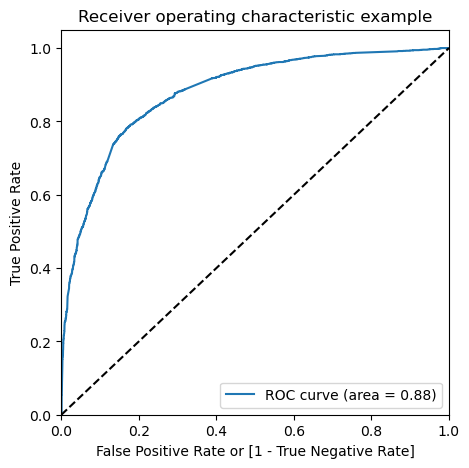

In [236]:
# Drawing ROC curve for Train Set
draw_roc(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"])

<strong><span style="color:Blue">NOTE:</span></strong> Area under ROC curve is 0.88 out of 1 which indicates a good predictive model

### 5.4.1 Finding Optimal Cutoff Point/ Probability
- It is that probability where we get `balanced sensitivity and specificity`

In [237]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.472448,1871,0,1,1,1,1,1,0,0,0,0,0
1,0,0.072762,6795,0,1,0,0,0,0,0,0,0,0,0
2,0,0.248657,3516,0,1,1,1,0,0,0,0,0,0,0
3,0,0.768727,8105,1,1,1,1,1,1,1,1,1,0,0
4,0,0.212550,3934,0,1,1,1,0,0,0,0,0,0,0


In [238]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.596784  0.973642  0.364568
0.2   0.2  0.722016  0.920519  0.599700
0.3   0.3  0.791899  0.833739  0.766117
0.4   0.4  0.814935  0.765207  0.845577
0.5   0.5  0.805504  0.657745  0.896552
0.6   0.6  0.793290  0.586375  0.920790
0.7   0.7  0.780148  0.509327  0.947026
0.8   0.8  0.754947  0.407543  0.969015
0.9   0.9  0.709184  0.251014  0.991504


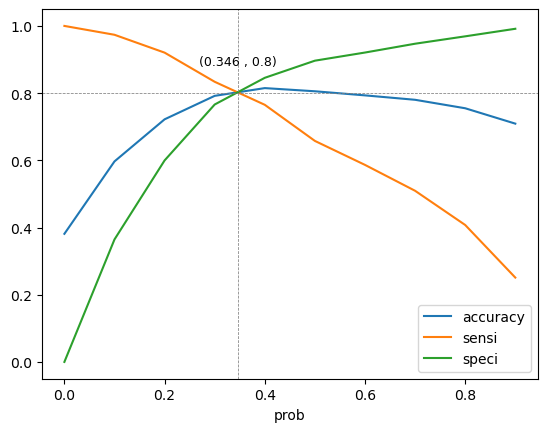

In [239]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

from scipy.interpolate import interp1d
from scipy.optimize import fsolve

# Finding the intersection points of the sensitivity and accuracy curves
sensi_interp = interp1d(cutoff_df['prob'], cutoff_df['sensi'], kind='linear')
acc_interp = interp1d(cutoff_df['prob'], cutoff_df['accuracy'], kind='linear')
intersection_1 = np.round(float(fsolve(lambda x : sensi_interp(x) - acc_interp(x), 0.5)), 3)

# Find the intersection points of the specificity and accuracy curves
speci_interp = interp1d(cutoff_df['prob'], cutoff_df['speci'], kind='linear')
intersection_2 = np.round(float(fsolve(lambda x : speci_interp(x) - acc_interp(x), 0.5)), 3)

# Calculate the average of the two intersection points
intersection_x = (intersection_1 + intersection_2) / 2

# Interpolate the accuracy, sensitivity, and specificity at the intersection point
accuracy_at_intersection = np.round(float(acc_interp(intersection_x)), 2)
sensitivity_at_intersection = np.round(float(sensi_interp(intersection_x)), 2)
specificity_at_intersection = np.round(float(speci_interp(intersection_x)), 2)

# Plot the three curves and add vertical and horizontal lines at intersection point
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'])
plt.axvline(x=intersection_x, color='grey',linewidth=0.55, linestyle='--')
plt.axhline(y=accuracy_at_intersection, color='grey',linewidth=0.55, linestyle='--')

# Adding annotation to display the (x,y) intersection point coordinates 
plt.annotate(f'({intersection_x} , {accuracy_at_intersection})',
             xy=(intersection_x, accuracy_at_intersection),
             xytext=(0,20),
             textcoords='offset points',
             ha='center',
             fontsize=9)

# Displaying the plot
plt.show()


<strong><span style="color:Blue">NOTE:</span></strong> 0.345 is the approx. point where all the curves meet, so 0.345 seems to be our `Optimal cutoff point` for probability threshold .
- Lets do mapping again using optimal cutoff point 

In [240]:
y_train_pred_final['final_predicted'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.345 else 0)

# deleting the unwanted columns from dataframe
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,"Predicted"],axis = 1, inplace = True) 
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,final_predicted
0,0,0.472448,1871,1
1,0,0.072762,6795,0
2,0,0.248657,3516,0
3,0,0.768727,8105,1
4,0,0.212550,3934,0


### 5.5 Calculating all metrics using confusion matrix for Train

In [241]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["final_predicted"]))

# or can be found using confusion matrix with formula, lets find all matrix in one go ahead using UDF

0.8050401978973407


In [242]:
# UDF for all Logistic Regression Metrics
def logreg_all_metrics(confusion_matrix):
    TN =confusion_matrix[0,0]
    TP =confusion_matrix[1,1]
    FP =confusion_matrix[0,1]
    FN =confusion_matrix[1,0]
    
    accuracy = (TN+TP)/(TN+TP+FN+FP)
    sensi = TP/(TP+FN)
    speci = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    TPR = TP/(TP + FN)
    TNR = TN/(TN + FP)
    
    #Calculate false postive rate - predicting conversion when customer does not have converted
    FPR = FP/(FP + TN)     
    FNR = FN/(FN +TP)
    
    print ("True Negative                    : ", TN)
    print ("True Positive                    : ", TP)
    print ("False Negative                   : ", FN)
    print ("False Positve                    : ", FP) 
    
    print ("Model Accuracy                   : ", round(accuracy,4))
    print ("Model Sensitivity                : ", round(sensi,4))
    print ("Model Specificity                : ", round(speci,4))
    print ("Model Precision                  : ", round(precision,4))
    print ("Model Recall                     : ", round(recall,4))
    print ("Model True Positive Rate (TPR)   : ", round(TPR,4))
    print ("Model False Positive Rate (FPR)  : ", round(FPR,4))
    
    

In [243]:
# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])
print("*"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("*"*50,"\n")

************************************************** 

Confusion Matrix
[[3233  769]
 [ 492 1974]] 

************************************************** 

True Negative                    :  3233
True Positive                    :  1974
False Negative                   :  492
False Positve                    :  769
Model Accuracy                   :  0.805
Model Sensitivity                :  0.8005
Model Specificity                :  0.8078
Model Precision                  :  0.7197
Model Recall                     :  0.8005
Model True Positive Rate (TPR)   :  0.8005
Model False Positive Rate (FPR)  :  0.1922


************************************************** 



### 5.6 Precision and recall tradeoff
- Let's compare all metrics of Precision-Recall view with Specificity-Sensivity view and get better probability threshold for boosting conversion rate to 80% as asked by CEO.

In [244]:
# Creating precision-recall tradeoff curve
y_train_pred_final['Converted'], y_train_pred_final['final_predicted']
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])

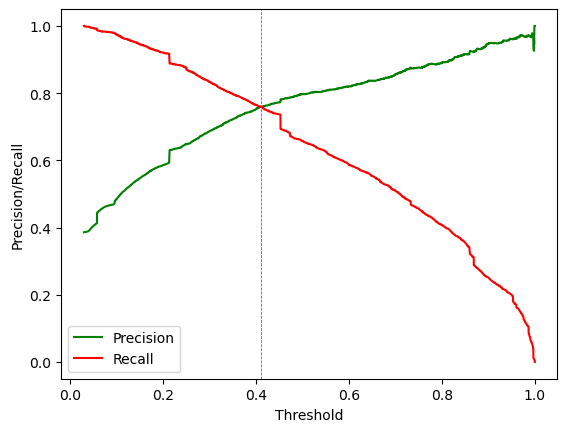

In [245]:
# plot precision-recall tradeoff curve
plt.plot(thresholds, p[:-1], "g-", label="Precision")
plt.plot(thresholds, r[:-1], "r-", label="Recall")

# add legend and axis labels

plt.axvline(x=0.41, color='teal',linewidth = 0.55, linestyle='--')
plt.legend(loc='lower left')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')

plt.show()

 The intersection point of the curve is the threshold value where the model achieves a balance between precision and recall. It can be used to optimise the performance of the model based on business requirement,Here our probability threshold is 0.41 aprrox from above curve.

In [246]:
# copying df to test model evaluation with precision recall threshold of 0.41
y_train_precision_recall = y_train_pred_final.copy()

In [247]:
# assigning a feature for 0.41 cutoff from precision recall curve to see which one is best view (sensi-speci or precision-recall)
y_train_precision_recall['precision_recall_prediction'] = y_train_precision_recall['Converted_Prob'].map( lambda x: 1 if x > 0.41 else 0)
y_train_precision_recall.head()

,Converted,Converted_Prob,Prospect ID,final_predicted,precision_recall_prediction
0,0,0.472448,1871,1,1
1,0,0.072762,6795,0,0
2,0,0.248657,3516,0,0
3,0,0.768727,8105,1,1
4,0,0.212550,3934,0,0


In [266]:
## Lets see all matrics at 0.41 cutoff in precision-recall view and compare it with 0.345 cutoff from sensi-speci view

# Finding Confusion metrics for 'y_train_precision_recall' df
confusion_matrix = metrics.confusion_matrix(y_train_precision_recall['Converted'], y_train_precision_recall['precision_recall_prediction'])


#
print("Confusion Matrix")
print(confusion_matrix,"\n")



# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)




Confusion Matrix
[[3408  594]
 [ 593 1873]] 

True Negative                    :  3408
True Positive                    :  1873
False Negative                   :  593
False Positve                    :  594
Model Accuracy                   :  0.8165
Model Sensitivity                :  0.7595
Model Specificity                :  0.8516
Model Precision                  :  0.7592
Model Recall                     :  0.7595
Model True Positive Rate (TPR)   :  0.7595
Model False Positive Rate (FPR)  :  0.1484



- As we can see in above metrics when we used precision-recall threshold cut-off of 0.41 the values in True Positive Rate ,Sensitivity, Recall have dropped to around 75%, but we need it close to 80% as the Business Objective.
- 80% for the metrics we are getting with the sensitivity-specificity cut-off threshold of 0.345. So, we will go with sensitivity-specificity view for our Optimal cut-off for final predictions.


- A higher score would mean that the lead is hot, i.e. is most likely to convert 
- Whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [249]:
# Lets add Lead Score 

y_train_pred_final['Lead_Score'] = y_train_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,final_predicted,Lead_Score
0,0,0.472448,1871,1,47
1,0,0.072762,6795,0,7
2,0,0.248657,3516,0,25
3,0,0.768727,8105,1,77
4,0,0.212550,3934,0,21


## Step 6: Making Predictions on test set

### 6.1 Scaling Test dataset

In [250]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2772 entries, 4269 to 2960
Data columns (total 46 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          2772 non-null   int64  
 1   TotalVisits                                           2772 non-null   float64
 2   Total Time Spent on Website                           2772 non-null   int64  
 3   Page Views Per Visit                                  2772 non-null   float64
 4   A free copy of Mastering The Interview                2772 non-null   int64  
 5   Lead Origin_Landing Page Submission                   2772 non-null   uint8  
 6   Lead Origin_Quick Add Form                            2772 non-null   uint8  
 7   Lead Source_Facebook                                  2772 non-null   uint8  
 8   Lead Source_Google                                    2

In [251]:
# fetching int64 and float64 dtype columns from dataframe for scaling
num_cols=X_test.select_dtypes(include=['int64','float64']).columns

# scaling columns
X_test[num_cols] = scaler.transform(X_test[num_cols])

X_test = X_test[rfe_col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Specialization_Hospitality Management,Specialization_Others,What is your current occupation_Housewife,What is your current occupation_Working Professional
4269,0.964504,0,0,0,0,0,0,0,1,0,1,0,0
2376,-0.885371,0,0,1,0,0,0,0,1,0,1,0,0
7766,-0.777416,0,0,0,0,0,0,1,0,0,0,0,1
9199,-0.885371,0,1,0,0,0,1,0,0,0,1,0,0
4359,-0.885371,0,0,1,0,1,0,0,0,0,0,0,0


### 6.2 Prediction on Test Dataset using final model 

In [252]:
# Adding contant value
X_test_sm = sm.add_constant(X_test)
X_test_sm.shape

(2772, 14)

In [253]:
# making prediction using model 4 (final model)
y_test_pred = logm4.predict(X_test_sm)

In [254]:
# top 10 columns
y_test_pred[:10]

4269    0.699406
2376    0.858903
7766    0.890120
9199    0.057111
4359    0.868461
9186    0.503186
1631    0.417210
8963    0.154155
8007    0.071469
5324    0.298085
dtype: float64

In [255]:
# Changing to dataframe of predicted probability
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

,0
4269,0.699406
2376,0.858903
7766,0.890120
9199,0.057111
4359,0.868461


In [256]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
4269,1
2376,1
7766,1
9199,0
4359,1


In [257]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_test_pred
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4269,0.699406
1,1,2376,0.858903
2,1,7766,0.890120
3,0,9199,0.057111
4,1,4359,0.868461


In [258]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)

y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,4269,1,0.699406
1,2376,1,0.858903
2,7766,1,0.890120
3,9199,0,0.057111
4,4359,1,0.868461


In [259]:
# taking sensitivity-specificity method at 0.345 probability cutoff during training
y_pred_final['final_predicted'] = y_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.345 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted
0,4269,1,0.699406,1
1,2376,1,0.858903,1
2,7766,1,0.890120,1
3,9199,0,0.057111,0
4,4359,1,0.868461,1


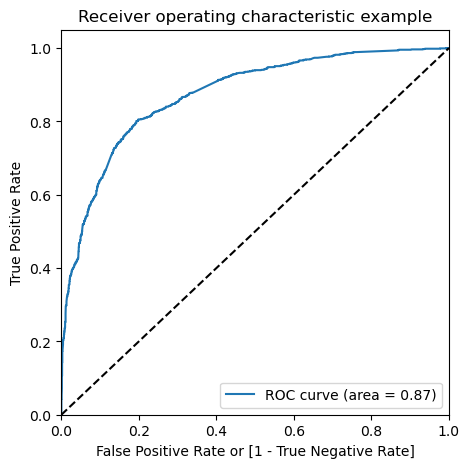

In [260]:
# Drawing ROC curve for Test Set
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final["Converted"], y_pred_final["Converted_Prob"], drop_intermediate = False )

draw_roc(y_pred_final["Converted"], y_pred_final["Converted_Prob"])

 Area under ROC curve is 0.87 out of 1 which indicates a good predictive model


- Now that the final predictions have been made, the next step would be to evaluate the performance of the predictive model on a test set. 
- We will do this by comparing the predicted labels (final_predicted) to the actual labels (Converted) to compute various performance metrics such as accuracy, precision, recall, etc.

### 6.3 Test set Model Evaluation
- Calculating all metrics using confusion matrix for Test set

In [261]:
# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['final_predicted'])
print("*"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("*"*50,"\n")

************************************************** 

Confusion Matrix
[[1353  324]
 [ 224  871]] 

************************************************** 

True Negative                    :  1353
True Positive                    :  871
False Negative                   :  224
False Positve                    :  324
Model Accuracy                   :  0.8023
Model Sensitivity                :  0.7954
Model Specificity                :  0.8068
Model Precision                  :  0.7289
Model Recall                     :  0.7954
Model True Positive Rate (TPR)   :  0.7954
Model False Positive Rate (FPR)  :  0.1932


************************************************** 



 The evaluation matrics are pretty close to each other so it indicates that the model is performing consistently across different evaluation metrics in both test and train dataset.
- For Test set
    - Accuracy : 80.34%
    - Sensitivity : 79.82% ≈ 80%
    - Specificity : 80.68%
    
These matrics are very close to train set, so out final model logm4 is  performing with good consistency on both Train & Test set

In [262]:
# features and their coefficicent from final model
parameters=logm4.params.sort_values(ascending=False)
parameters

What is your current occupation_Housewife               23.017356
Lead Source_Welingak Website                             5.389647
Lead Source_Reference                                    2.905848
What is your current occupation_Working Professional     2.677711
Last Activity_SMS Sent                                   2.061737
Last Activity_Others                                     1.262880
Total Time Spent on Website                              1.050944
Last Activity_Email Opened                               0.943646
Lead Source_Olark Chat                                   0.908112
Last Activity_Olark Chat Conversation                   -0.550690
const                                                   -1.031602
Specialization_Hospitality Management                   -1.087051
Specialization_Others                                   -1.199302
Lead Origin_Landing Page Submission                     -1.263769
dtype: float64

 A high positive coefficient indicates that a variable has a stronger influence on predicting the probability of leads converting to take up X-Education's course.

 Adding `Lead Score` Feature to Test dataframe
- A higher score would mean that the lead is hot, i.e. is most likely to convert 
- Whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [263]:
# Lets add Lead Score 

y_pred_final['Lead_Score'] = y_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted,Lead_Score
0,4269,1,0.699406,1,70
1,2376,1,0.858903,1,86
2,7766,1,0.890120,1,89
3,9199,0,0.057111,0,6
4,4359,1,0.868461,1,87


Lead Score: Lead Score is assigned to the customers
- The customers with a higher lead score have a higher conversion chance 
- The customers with a lower lead score have a lower conversion chance.

<hr/>

## Conclusion 



- The model achieved a `sensitivity of 80.05%` in the train set and 79.82% in the test set, using a cut-off value of 0.345.
- Sensitivity in this case indicates how many leads the model identify correctly out of all potential leads which are converting
- `The CEO of X Education had set a target sensitivity of around 80%.`
- The model also achieved an accuracy of 80.46%, which is in line with the study's objectives.



### Recommendations 

#### To increase our Lead Conversion Rates:

- Focus on features with positive coefficients for targeted marketing strategies.
- Develop strategies to attract high-quality leads from top-performing lead sources.
- Engage working professionals with tailored messaging.
- Optimize communication channels based on lead engagement impact.
- More budget/spend can be done on Welingak Website in terms of advertising, etc.
- Incentives/discounts for providing reference that convert to lead, encourage providing more references.
- Working professionals to be aggressively targeted as they have high conversion rate and will have better financial situation to pay higher fees too. 


### To identify areas of improvement: 

- Analyze negative coefficients in specialization offerings.
- Review landing page submission process for areas of improvement.



